In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

## plot the clustering results for all gene in target samples

In [3]:
df_gene_cluster = pd.read_csv("df_gene_cluster.csv",header=0,index_col=0)
df_gene_cluster.set_index('Variety',inplace=True)
df_gene_cluster = df_gene_cluster.drop(df_gene_cluster.columns[0], axis=1) ## remove first column
df_gene_cluster.head()

HORVU.MOREX.r3.1HG0008330 HORVU.MOREX.r3.1HG0009400  \
Variety                                                         
Binalong                        low                       mid   
020055-57                       low                       mid   
Oxford                          low                       low   
VTAdmiral                       low                       mid   
07T738                          low                       low   

          HORVU.MOREX.r3.1HG0023370 HORVU.MOREX.r3.1HG0053590  \
Variety                                                         
Binalong                        mid                      high   
020055-57                       mid                       mid   
Oxford                          mid                      high   
VTAdmiral                       mid                       mid   
07T738                         high                       mid   

          HORVU.MOREX.r3.1HG0065060 HORVU.MOREX.r3.1HG0082040  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                       mid   
07T738                          mid                       mid   

          HORVU.MOREX.r3.1HG0087000 HORVU.MOREX.r3.2HG0097880  \
Variety                                                         
Binalong                        low                       mid   
020055-57                       low                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                      high   
07T738                          mid                      high   

          HORVU.MOREX.r3.2HG0126910 HORVU.MOREX.r3.2HG0134090  ...  \
Variety                                                        ...   
Binalong                       high                       mid  ...   
020055-57                       mid                       mid  ...   
Oxford                         high                       mid  ...   
VTAdmiral                       mid                       mid  ...   
07T738                          mid                       mid  ...   

          HORVU.MOREX.r3.7HG0687350 HORVU.MOREX.r3.7HG0702190  \
Variety                                                         
Binalong                        low                      high   
020055-57                       low                      high   
Oxford                          low                      high   
VTAdmiral                       low                      high   
07T738                          low                       mid   

          HORVU.MOREX.r3.7HG0704620 HORVU.MOREX.r3.7HG0716320  \
Variety                                                         
Binalong                        mid                      high   
020055-57                       low                      high   
Oxford                          low                      high   
VTAdmiral                       low                      high   
07T738                          low                      high   

          HORVU.MOREX.r3.7HG0716480 HORVU.MOREX.r3.7HG0718540  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                       mid   
07T738                          mid                       mid   

          HORVU.MOREX.r3.7HG0720900 HORVU.MOREX.r3.7HG0721170  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          low                       mid   
VT

In [4]:
GENES = [col for col in df_gene_cluster.columns if col.startswith("HORVU")]
df_cluster = df_gene_cluster[GENES]
melted_cluster = df_cluster.melt(var_name='gene',value_name='Cluster')
melted_cluster.head()

gene Cluster
0  HORVU.MOREX.r3.1HG0008330     low
1  HORVU.MOREX.r3.1HG0008330     low
2  HORVU.MOREX.r3.1HG0008330     low
3  HORVU.MOREX.r3.1HG0008330     low
4  HORVU.MOREX.r3.1HG0008330     low

In [5]:
melted_cluster['tmp'] = 1
cluster_count = melted_cluster.groupby(['gene','Cluster']).tmp.agg(['count']).reset_index()
cluster_count.loc[cluster_count['Cluster'] == 'low', 'count'] = -cluster_count['count']
cluster_count.head()

gene Cluster  count
0  HORVU.MOREX.r3.1HG0008330    high     29
1  HORVU.MOREX.r3.1HG0008330     low   -376
2  HORVU.MOREX.r3.1HG0008330     mid     31
3  HORVU.MOREX.r3.1HG0009400    high     12
4  HORVU.MOREX.r3.1HG0009400     low   -264

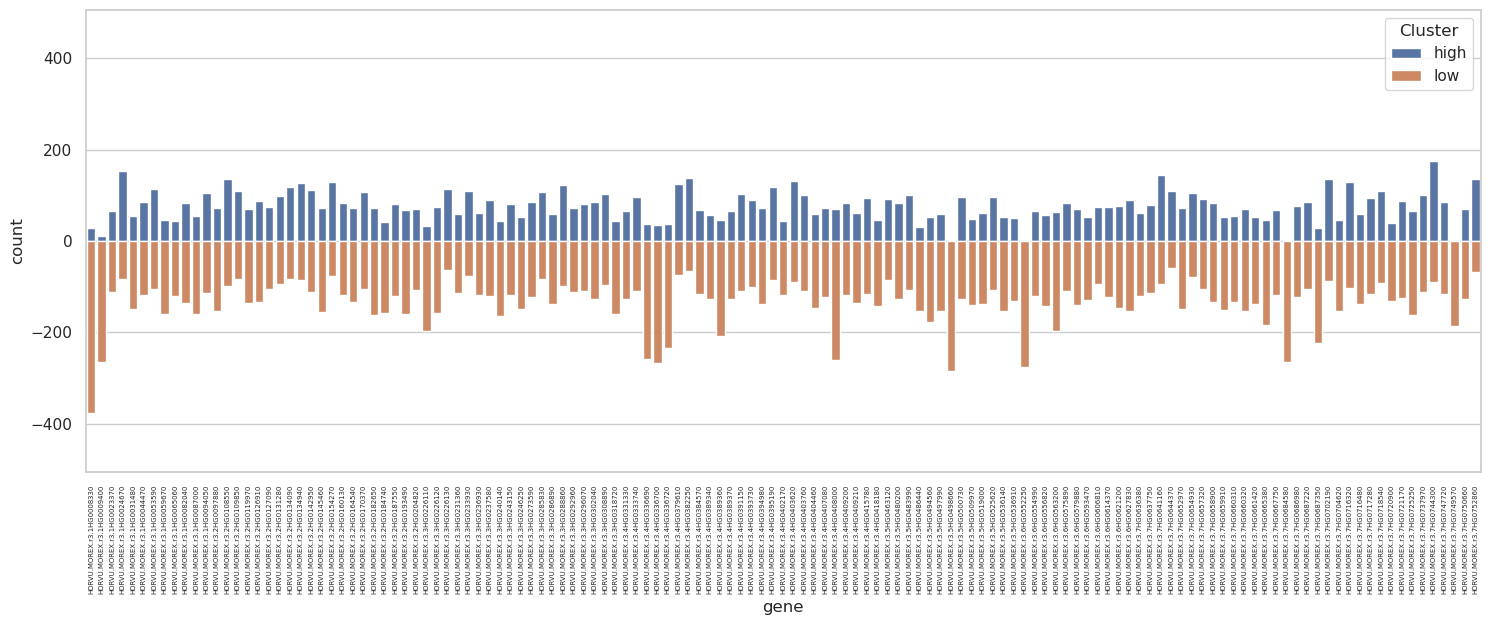

In [7]:
f, ax = plt.subplots(figsize=(18,6))
sns.set_theme(style="whitegrid")
data=cluster_count[cluster_count['Cluster'] != 'mid']
sns.barplot(x='gene', y='count', hue='Cluster', data=data, dodge=False)
plt.ylim(-505, 505)
plt.xticks(rotation=90,fontsize=5)
plt.show()
f.savefig("gene_matrix_cluster_distribution.png",dpi=300,bbox_inches='tight')

In [8]:
## plot the gene coverage values
df_matrix = pd.read_csv("gene_matrix.csv",index_col=0,header=0)
df_matrix.head()

Sample  HORVU.MOREX.r3.1HG0008330  \
0  PL1-A01-Binalong-Pool-01_S1215_L004                   1.685232   
1     PL1-A02-Fleet-Pool-01_S1216_L004                   2.398314   
2   PL1-A03-Kaputar-Pool-01_S1217_L004                   2.438807   
3    PL1-A04-Oxford-Pool-01_S1218_L004                   2.224618   
4  PL1-A05-Sloop_SA-Pool-01_S1219_L004                   2.555278   

   HORVU.MOREX.r3.1HG0009400  HORVU.MOREX.r3.1HG0023370  \
0                   8.151967                   1.438937   
1                   6.215545                   1.354300   
2                   1.264313                   1.373672   
3                   1.167693                   1.407713   
4                   5.799929                   1.394437   

   HORVU.MOREX.r3.1HG0024670  HORVU.MOREX.r3.1HG0031480  \
0                   1.372202                   1.347777   
1                   1.326362                   1.262838   
2                   1.365444                   1.365444   
3                   1.351774                   1.344135   
4                   1.363409                   1.325250   

   HORVU.MOREX.r3.1HG0044470  HORVU.MOREX.r3.1HG0053590  \
0                   1.043229                   1.318038   
1                   1.061807                   1.223037   
2                   1.304765                   1.280425   
3                   1.151922                   1.282159   
4                   1.140157                   1.222896   

   HORVU.MOREX.r3.1HG0059670  HORVU.MOREX.r3.1HG0065060  ...  \
0                   1.174348                   0.917118  ...   
1                   1.181832                   0.895271  ...   
2                   1.078162                   0.933836  ...   
3                   1.025259                   0.926072  ...   
4                   1.041369                   0.941512  ...   

   HORVU.MOREX.r3.7HG0720900  HORVU.MOREX.r3.7HG0721170  \
0                   0.172305                   1.090751   
1                   0.179491                   1.059154   
2                   0.196092                   1.078505   
3                   0.143174                   1.080212   
4                   0.191512                   1.029244   

   HORVU.MOREX.r3.7HG0725250  HORVU.MOREX.r3.7HG0737970  \
0                   0.236178                   1.322534   
1                   0.231310                   1.322148   
2                   0.276654                   1.406582   
3                   0.200961                   1.544110   
4                   0.282097                   1.402282   

   HORVU.MOREX.r3.7HG0744300  HORVU.MOREX.r3.7HG0747720  \
0                   4.842616                   0.352683   
1                   3.003122                   0.287810   
2                   4.928694                   0.302023   
3                   4.641326                   0.314687   
4                   2.022111                   0.308131   

   HORVU.MOREX.r3.7HG0749570  HORVU.MOREX.r3.7HG0750660  \
0                   1.461114                   0.449566   
1                   1.182769                   0.421414   
2                   1.401783                   0.466918   
3                   1.419049                   0.366683   
4                   1.121255                   0.453638   

   HORVU.MOREX.r3.7HG0752860   Variety  
0                   1.275933  Binalong  
1                   1.211644     Fleet  
2                   1.219403   Kaputar  
3                   1.273287    Oxford  
4                   1.378745  Sloop_SA  

[5 rows x 136 columns]

In [9]:
melted_matrix = df_matrix.reset_index().melt(id_vars='Variety', var_name='gene', value_name='coverage')
melted_matrix.head()

Variety   gene coverage
0  Binalong  index        0
1     Fleet  index        1
2   Kaputar  index        2
3    Oxford  index        3
4  Sloop_SA  index        4

In [10]:
df_cluster.head()

HORVU.MOREX.r3.1HG0008330 HORVU.MOREX.r3.1HG0009400  \
Variety                                                         
Binalong                        low                       mid   
020055-57                       low                       mid   
Oxford                          low                       low   
VTAdmiral                       low                       mid   
07T738                          low                       low   

          HORVU.MOREX.r3.1HG0023370 HORVU.MOREX.r3.1HG0053590  \
Variety                                                         
Binalong                        mid                      high   
020055-57                       mid                       mid   
Oxford                          mid                      high   
VTAdmiral                       mid                       mid   
07T738                         high                       mid   

          HORVU.MOREX.r3.1HG0065060 HORVU.MOREX.r3.1HG0082040  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                       mid   
07T738                          mid                       mid   

          HORVU.MOREX.r3.1HG0087000 HORVU.MOREX.r3.2HG0097880  \
Variety                                                         
Binalong                        low                       mid   
020055-57                       low                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                      high   
07T738                          mid                      high   

          HORVU.MOREX.r3.2HG0126910 HORVU.MOREX.r3.2HG0134090  ...  \
Variety                                                        ...   
Binalong                       high                       mid  ...   
020055-57                       mid                       mid  ...   
Oxford                         high                       mid  ...   
VTAdmiral                       mid                       mid  ...   
07T738                          mid                       mid  ...   

          HORVU.MOREX.r3.7HG0687350 HORVU.MOREX.r3.7HG0702190  \
Variety                                                         
Binalong                        low                      high   
020055-57                       low                      high   
Oxford                          low                      high   
VTAdmiral                       low                      high   
07T738                          low                       mid   

          HORVU.MOREX.r3.7HG0704620 HORVU.MOREX.r3.7HG0716320  \
Variety                                                         
Binalong                        mid                      high   
020055-57                       low                      high   
Oxford                          low                      high   
VTAdmiral                       low                      high   
07T738                          low                      high   

          HORVU.MOREX.r3.7HG0716480 HORVU.MOREX.r3.7HG0718540  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          mid                       mid   
VTAdmiral                       mid                       mid   
07T738                          mid                       mid   

          HORVU.MOREX.r3.7HG0720900 HORVU.MOREX.r3.7HG0721170  \
Variety                                                         
Binalong                        mid                       mid   
020055-57                       mid                       mid   
Oxford                          low                       mid   
VT

In [11]:
melted_cluster_new = df_cluster.reset_index().melt(id_vars='Variety', var_name='gene',value_name='Cluster')
melted_cluster_new

Variety                       gene Cluster
0          Binalong  HORVU.MOREX.r3.1HG0008330     low
1         020055-57  HORVU.MOREX.r3.1HG0008330     low
2            Oxford  HORVU.MOREX.r3.1HG0008330     low
3         VTAdmiral  HORVU.MOREX.r3.1HG0008330     low
4            07T738  HORVU.MOREX.r3.1HG0008330     low
...             ...                        ...     ...
57983         TR584  HORVU.MOREX.r3.7HG0752860     mid
57984        Maresi  HORVU.MOREX.r3.7HG0752860     low
57985       C98A-61  HORVU.MOREX.r3.7HG0752860     low
57986       IGB1133  HORVU.MOREX.r3.7HG0752860    high
57987  C2-05-89-893  HORVU.MOREX.r3.7HG0752860     low

[57988 rows x 3 columns]

In [12]:
df_cluster_coverage = melted_cluster_new.merge(melted_matrix,on=['Variety','gene'])
df_cluster_coverage

Variety                       gene Cluster  coverage
0          Binalong  HORVU.MOREX.r3.1HG0008330     low  1.685232
1         020055-57  HORVU.MOREX.r3.1HG0008330     low  2.453335
2            Oxford  HORVU.MOREX.r3.1HG0008330     low  2.224618
3            07T738  HORVU.MOREX.r3.1HG0008330     low  2.012708
4            Mackay  HORVU.MOREX.r3.1HG0008330     low   2.51147
...             ...                        ...     ...       ...
50668         TR584  HORVU.MOREX.r3.7HG0752860     mid  1.285714
50669        Maresi  HORVU.MOREX.r3.7HG0752860     low  0.849138
50670       C98A-61  HORVU.MOREX.r3.7HG0752860     low  0.495455
50671       IGB1133  HORVU.MOREX.r3.7HG0752860    high  1.346154
50672  C2-05-89-893  HORVU.MOREX.r3.7HG0752860     low  0.853175

[50673 rows x 4 columns]

## Filter geno and pheno data, perform ttest

In [13]:
df_all = pd.read_csv("all_experiments.csv",header=0,index_col=0)
df_all

Environment           trait  pheno_count_with_nan  \
0            MU19_CONTROL       AWNLENGTH                   336   
1            MU19_CONTROL       AWNLENGTH                   336   
2            MU19_CONTROL       AWNLENGTH                   336   
3            MU19_CONTROL       AWNLENGTH                   336   
4            MU19_CONTROL       AWNLENGTH                   336   
...                   ...             ...                   ...   
6765173  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765174  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765175  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765176  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765177  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   

         pheno_count_missing        Variety  phenotype_value  \
0                          9      020055-57           115.74   
1                          9       02055-94           105.00   
2                          9      04053-034           108.33   
3                          9      04056-088           101.67   
4                          9  04S213D-B-125            93.33   
...                      ...            ...              ...   
6765173                   13         WI2553             0.86   
6765174                   13         WI2816             0.87   
6765175                   13         WI2868             0.88   
6765176                   13         WI2817             0.88   
6765177                   13         Yambla             0.85   

                              gene genotype_cluster  genotype_value  \
0        HORVU.MOREX.r3.1HG0008330              low       38.205144   
1        HORVU.MOREX.r3.1HG0008330              low       37.624068   
2        HORVU.MOREX.r3.1HG0008330              low       35.754721   
3        HORVU.MOREX.r3.1HG0008330              low       37.275728   
4        HORVU.MOREX.r3.1HG0008330              low       42.007536   
...                            ...              ...             ...   
6765173  HORVU.MOREX.r3.7HG0752860              mid       16.546893   
6765174  HORVU.MOREX.r3.7HG0752860             high       19.377957   
6765175  HORVU.MOREX.r3.7HG0752860              mid       17.778967   
6765176  HORVU.MOREX.r3.7HG0752860              mid       18.801271   
6765177  HORVU.MOREX.r3.7HG0752860             high       19.393968   

         without_nan_count_high  without_nan_count_low  
0                           291                     23  
1                           291                     23  
2                           291                     23  
3                           291                     23  
4                           291                     23  
...                         ...                    ...  
6765173                      53                    105  
6765174                      53                    105  
6765175                      53                    105  
6765176                      53                    105  
6765177                      53                    105  

[6765178 rows x 11 columns]

In [14]:
experiment_list = list(df_all['Environment'].unique())
experiment_list

['MU19_CONTROL',
 'MU20_CONTROL',
 'MU19_20_MET_CONTROL',
 'MU19_HEAT',
 'MU20_HEAT',
 'MU19_20_MET_HEAT',
 'WH19_HEAT',
 'WH20_HEAT',
 'WH19_20_MET_HEAT']

In [15]:
df_all['Environment'].value_counts()

Environment
WH19_20_MET_HEAT       823137
MU20_HEAT              788956
MU19_20_MET_CONTROL    778183
MU19_20_MET_HEAT       774326
WH19_HEAT              761292
MU20_CONTROL           741342
MU19_CONTROL           716072
WH20_HEAT              705698
MU19_HEAT              676172
Name: count, dtype: int64

In [16]:
##check non numeric value in phenotype data
non_numeric_values = []
for index, value in df_all['phenotype_value'].items():
    try:
        float(value)
    except ValueError:
        non_numeric_values.append((index, value))

In [17]:
len(non_numeric_values)

0

In [18]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ## loop through experiment, trait, and genes, for num_high and num_low both > 0, do ttests and output results
    stats_list = ['Environment',
                  'trait',
                  'gene',
                  'num_high',
                  'num_low',
                  #'num_mid',
                  't_stat',
                  'p_value']
    
    array_2D = []
    ## loop experiments
    for experiment in experiment_list:
        #get experiment data
        df_experiment = df_all[df_all['Environment'] == experiment]
        
        #get trait list
        trait_list = list(df_experiment['trait'].unique())
        
        ## loop traits
        for trait in trait_list:
            df_experiment_trait = df_experiment[df_experiment['trait'] == trait]
            gene_list = list(df_experiment_trait['gene'].unique())
            
            ## loop genes
            for gene in gene_list:
                df_experiment_trait_gene = df_experiment_trait[df_experiment_trait['gene'] == gene]
                num_cluster = len(df_experiment_trait_gene['genotype_cluster'].value_counts())
                
                ## count high and low
                series = df_experiment_trait_gene["genotype_cluster"].value_counts()
                num_high = 0
                num_low = 0
                num_mid = 0
                if 'high' in series.index:
                    num_high = series['high'] 
                if 'low' in series.index:
                    num_low = series['low']
                #if 'mid' in series.index:
                #    num_low = series['mid']
                ## with low and high data
                if num_high * num_low > 0:
                    group1 = df_experiment_trait_gene[df_experiment_trait_gene["genotype_cluster"] == "high"]["phenotype_value"].dropna()
                    group2 = df_experiment_trait_gene[df_experiment_trait_gene["genotype_cluster"] == "low"]["phenotype_value"].dropna()
                    ## ttests
                    t_stat, p_value = ttest_ind(group1, group2)
                else:
                    t_stat, p_value = (np.nan, np.nan)
                
                #para_list = [experiment, trait, gene, num_high, num_low, num_mid, t_stat, p_value]
                para_list = [experiment, trait, gene, num_high, num_low, t_stat, p_value]
                
                array_2D.append(para_list)
    df_stats = pd.DataFrame(array_2D, columns=stats_list)
    df_stats.to_csv("all_experiment_ttests.csv")

## Select target gene, and count trait and trial

In [19]:
df_stats

Environment           trait                       gene  num_high  \
0          MU19_CONTROL       AWNLENGTH  HORVU.MOREX.r3.1HG0008330        22   
1          MU19_CONTROL       AWNLENGTH  HORVU.MOREX.r3.1HG0009400        11   
2          MU19_CONTROL       AWNLENGTH  HORVU.MOREX.r3.1HG0023370        55   
3          MU19_CONTROL       AWNLENGTH  HORVU.MOREX.r3.1HG0053590        87   
4          MU19_CONTROL       AWNLENGTH  HORVU.MOREX.r3.1HG0065060        36   
...                 ...             ...                        ...       ...   
21408  WH19_20_MET_HEAT  SPIKEFERTINDEX  HORVU.MOREX.r3.7HG0718540        86   
21409  WH19_20_MET_HEAT  SPIKEFERTINDEX  HORVU.MOREX.r3.7HG0720900        31   
21410  WH19_20_MET_HEAT  SPIKEFERTINDEX  HORVU.MOREX.r3.7HG0721170        67   
21411  WH19_20_MET_HEAT  SPIKEFERTINDEX  HORVU.MOREX.r3.7HG0750660        49   
21412  WH19_20_MET_HEAT  SPIKEFERTINDEX  HORVU.MOREX.r3.7HG0752860       102   

       num_low    t_stat   p_value  
0          283 -1.253851  0.210863  
1          201 -0.816462  0.415161  
2           81 -0.819151  0.414155  
3           80  1.125279  0.262105  
4           83  1.185320  0.238293  
...        ...       ...       ...  
21408       64 -0.517518  0.605567  
21409       95 -0.563635  0.574020  
21410       93 -0.756520  0.450464  
21411       98  0.713922  0.476423  
21412       51  0.154776  0.877205  

[21413 rows x 7 columns]

In [20]:
## apply p-value threshold of 0.01, for each gene, count what trait in how many trials were detected
df_stats_filter = df_stats[df_stats['p_value'] <= 0.05]
gene_count_trait = df_stats_filter.groupby(['gene']).trait.agg(['count']).reset_index()
gene_count_trait.columns = ['gene','how_many_trait']
gene_count_trait

gene  how_many_trait
0    HORVU.MOREX.r3.1HG0008330              18
1    HORVU.MOREX.r3.1HG0009400               9
2    HORVU.MOREX.r3.1HG0023370               9
3    HORVU.MOREX.r3.1HG0024670              10
4    HORVU.MOREX.r3.1HG0031480               9
..                         ...             ...
127  HORVU.MOREX.r3.7HG0744300              11
128  HORVU.MOREX.r3.7HG0747720               4
129  HORVU.MOREX.r3.7HG0749570              11
130  HORVU.MOREX.r3.7HG0750660               8
131  HORVU.MOREX.r3.7HG0752860               7

[132 rows x 2 columns]

In [21]:
gene_trait_count_trial = df_stats_filter.groupby(['gene','trait']).Environment.agg(['count']).reset_index()
gene_trait_count_trial.columns = ['gene','what_trait','gene_trait_how_many_trial']
gene_trait_count_trial.head()

gene     what_trait  gene_trait_how_many_trial
0  HORVU.MOREX.r3.1HG0008330  FILLED GRAINS                          5
1  HORVU.MOREX.r3.1HG0008330     HEADWEIGHT                          4
2  HORVU.MOREX.r3.1HG0008330         HEIGHT                          1
3  HORVU.MOREX.r3.1HG0008330         LENGTH                          2
4  HORVU.MOREX.r3.1HG0008330         MINITW                          2

In [22]:
## merge trait count and trial count
df_count = gene_trait_count_trial.merge(gene_count_trait, on='gene')
df_count = df_count[['gene','how_many_trait','what_trait','gene_trait_how_many_trial']]
df_count.head()

gene  how_many_trait     what_trait  \
0  HORVU.MOREX.r3.1HG0008330              18  FILLED GRAINS   
1  HORVU.MOREX.r3.1HG0008330              18     HEADWEIGHT   
2  HORVU.MOREX.r3.1HG0008330              18         HEIGHT   
3  HORVU.MOREX.r3.1HG0008330              18         LENGTH   
4  HORVU.MOREX.r3.1HG0008330              18         MINITW   

   gene_trait_how_many_trial  
0                          5  
1                          4  
2                          1  
3                          2  
4                          2

In [23]:
df_count['gene'].nunique()

132

## merge 76 genome info to df_count

In [24]:
## merge with data in 76 pangenomes
df_pan=pd.read_csv("merged_gemoma_output_CBHfertility.count", delimiter='\t', header=None)
df_pan.columns=['V3','count','var','type']
df_pan['V3']=df_pan['V3'].str[:-2] + '1'
#df_pan['V3'] = df_pan['V3'].str.replace('HORVU.MOREX.r3.HORVU.MOREX.r3.4HG0377280.1','HORVU.MOREX.r3.4HG0377280.1')
df_pan

V3  count        var type
0     HORVU.MOREX.r3.1HG0008320.1      4    10TJ18     D
1     HORVU.MOREX.r3.1HG0009400.1      1    10TJ18     D
2     HORVU.MOREX.r3.1HG0010090.1      0    10TJ18     D
3     HORVU.MOREX.r3.1HG0044470.1      1    10TJ18     D
4     HORVU.MOREX.r3.1HG0059670.1      1    10TJ18     D
...                           ...    ...        ...  ...
9799  HORVU.MOREX.r3.7HG0744300.1      2   WBDC349     W
9800  HORVU.MOREX.r3.7HG0744330.1      0   WBDC349     W
9801  HORVU.MOREX.r3.7HG0749570.1      1   WBDC349     W
9802  HORVU.MOREX.r3.7HG0750660.1      1   WBDC349     W
9803  HORVU.MOREX.r3.7HG0752860.1      1   WBDC349     W

[9804 rows x 4 columns]

In [26]:
len(df_pan['V3'].unique())

129

In [27]:
df_pan_group = df_pan.groupby(['V3']).agg({'count': ['median', 'min', 'max','std']})
df_pan_group.columns = df_pan_group.columns.get_level_values(1)
df_pan_group=df_pan_group.reset_index()
df_pan_group['V3'] = df_pan_group['V3'].str.strip()
df_pan_group.head()

V3  median  min  max       std
0  HORVU.MOREX.r3.1HG0008320.1     1.0    0    5  1.249000
1  HORVU.MOREX.r3.1HG0009400.1     2.0    0   10  2.589147
2  HORVU.MOREX.r3.1HG0010090.1     0.0    0    1  0.224781
3  HORVU.MOREX.r3.1HG0044470.1     1.0    1    1  0.000000
4  HORVU.MOREX.r3.1HG0059670.1     1.0    1    1  0.000000

In [28]:
df_pan_group['CNV'] = np.where(df_pan_group['std'] > 0, 'YES', 'NO')
df_pan_group.head()

V3  median  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0008320.1     1.0    0    5  1.249000  YES
1  HORVU.MOREX.r3.1HG0009400.1     2.0    0   10  2.589147  YES
2  HORVU.MOREX.r3.1HG0010090.1     0.0    0    1  0.224781  YES
3  HORVU.MOREX.r3.1HG0044470.1     1.0    1    1  0.000000   NO
4  HORVU.MOREX.r3.1HG0059670.1     1.0    1    1  0.000000   NO

In [29]:
df_pan_group['V3'].str.endswith('.1').value_counts()

V3
True    129
Name: count, dtype: int64

In [30]:
target_gene = list(df_count['gene'].unique())
target_gene = [x + '.1' for x in target_gene]
df_pan_group_target = df_pan_group[df_pan_group['V3'].isin(target_gene)]
df_pan_group_target['CNV'].value_counts()

CNV
NO     68
YES    38
Name: count, dtype: int64

In [31]:
df_count.head()

gene  how_many_trait     what_trait  \
0  HORVU.MOREX.r3.1HG0008330              18  FILLED GRAINS   
1  HORVU.MOREX.r3.1HG0008330              18     HEADWEIGHT   
2  HORVU.MOREX.r3.1HG0008330              18         HEIGHT   
3  HORVU.MOREX.r3.1HG0008330              18         LENGTH   
4  HORVU.MOREX.r3.1HG0008330              18         MINITW   

   gene_trait_how_many_trial  
0                          5  
1                          4  
2                          1  
3                          2  
4                          2

In [32]:
df_pan_group.head()

V3  median  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0008320.1     1.0    0    5  1.249000  YES
1  HORVU.MOREX.r3.1HG0009400.1     2.0    0   10  2.589147  YES
2  HORVU.MOREX.r3.1HG0010090.1     0.0    0    1  0.224781  YES
3  HORVU.MOREX.r3.1HG0044470.1     1.0    1    1  0.000000   NO
4  HORVU.MOREX.r3.1HG0059670.1     1.0    1    1  0.000000   NO

In [33]:
df_count['gene'] = df_count['gene'] + '.1'

In [34]:
df_count_pan_group = df_count.merge(df_pan_group,left_on='gene',right_on='V3',how='left')
df_count_pan_group.head()

gene  how_many_trait     what_trait  \
0  HORVU.MOREX.r3.1HG0008330.1              18  FILLED GRAINS   
1  HORVU.MOREX.r3.1HG0008330.1              18     HEADWEIGHT   
2  HORVU.MOREX.r3.1HG0008330.1              18         HEIGHT   
3  HORVU.MOREX.r3.1HG0008330.1              18         LENGTH   
4  HORVU.MOREX.r3.1HG0008330.1              18         MINITW   

   gene_trait_how_many_trial   V3  median  min  max  std  CNV  
0                          5  NaN     NaN  NaN  NaN  NaN  NaN  
1                          4  NaN     NaN  NaN  NaN  NaN  NaN  
2                          1  NaN     NaN  NaN  NaN  NaN  NaN  
3                          2  NaN     NaN  NaN  NaN  NaN  NaN  
4                          2  NaN     NaN  NaN  NaN  NaN  NaN

In [35]:
df_count_pan_group.to_csv("gene_count_trait_and_trail_p01.csv")

## merge 76 genome info to df_stats

In [36]:
df_stats.head()

Environment      trait                       gene  num_high  num_low  \
0  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0008330        22      283   
1  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0009400        11      201   
2  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0023370        55       81   
3  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0053590        87       80   
4  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0065060        36       83   

     t_stat   p_value  
0 -1.253851  0.210863  
1 -0.816462  0.415161  
2 -0.819151  0.414155  
3  1.125279  0.262105  
4  1.185320  0.238293

In [37]:
df_stats['gene'] = df_stats['gene'] + '.1'

In [38]:
df_stats_pan_group = df_stats.merge(df_pan_group,left_on='gene',right_on='V3',how='left')
df_stats_pan_group.head()

Environment      trait                         gene  num_high  num_low  \
0  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0008330.1        22      283   
1  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0009400.1        11      201   
2  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0023370.1        55       81   
3  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0053590.1        87       80   
4  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0065060.1        36       83   

     t_stat   p_value                           V3  median  min   max  \
0 -1.253851  0.210863                          NaN     NaN  NaN   NaN   
1 -0.816462  0.415161  HORVU.MOREX.r3.1HG0009400.1     2.0  0.0  10.0   
2 -0.819151  0.414155                          NaN     NaN  NaN   NaN   
3  1.125279  0.262105                          NaN     NaN  NaN   NaN   
4  1.185320  0.238293                          NaN     NaN  NaN   NaN   

        std  CNV  
0       NaN  NaN  
1  2.589147  YES  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN

In [39]:
df_stats_pan_group.to_csv("all_experiment_ttests_with_pan_info.csv")

## Plot target genes

In [40]:
## target gene, trait, experiment with p-value < 0.01 in df_stats
df_stats.head()

Environment      trait                         gene  num_high  num_low  \
0  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0008330.1        22      283   
1  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0009400.1        11      201   
2  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0023370.1        55       81   
3  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0053590.1        87       80   
4  MU19_CONTROL  AWNLENGTH  HORVU.MOREX.r3.1HG0065060.1        36       83   

     t_stat   p_value  
0 -1.253851  0.210863  
1 -0.816462  0.415161  
2 -0.819151  0.414155  
3  1.125279  0.262105  
4  1.185320  0.238293

In [41]:
df_all.head()

Environment      trait  pheno_count_with_nan  pheno_count_missing  \
0  MU19_CONTROL  AWNLENGTH                   336                    9   
1  MU19_CONTROL  AWNLENGTH                   336                    9   
2  MU19_CONTROL  AWNLENGTH                   336                    9   
3  MU19_CONTROL  AWNLENGTH                   336                    9   
4  MU19_CONTROL  AWNLENGTH                   336                    9   

         Variety  phenotype_value                       gene genotype_cluster  \
0      020055-57           115.74  HORVU.MOREX.r3.1HG0008330              low   
1       02055-94           105.00  HORVU.MOREX.r3.1HG0008330              low   
2      04053-034           108.33  HORVU.MOREX.r3.1HG0008330              low   
3      04056-088           101.67  HORVU.MOREX.r3.1HG0008330              low   
4  04S213D-B-125            93.33  HORVU.MOREX.r3.1HG0008330              low   

   genotype_value  without_nan_count_high  without_nan_count_low  
0       38.205144                     291                     23  
1       37.624068                     291                     23  
2       35.754721                     291                     23  
3       37.275728                     291                     23  
4       42.007536                     291                     23

In [42]:
df_all['gene'] = df_all['gene'] + '.1'

In [43]:
df_pan_group.head()

V3  median  min  max       std  CNV
0  HORVU.MOREX.r3.1HG0008320.1     1.0    0    5  1.249000  YES
1  HORVU.MOREX.r3.1HG0009400.1     2.0    0   10  2.589147  YES
2  HORVU.MOREX.r3.1HG0010090.1     0.0    0    1  0.224781  YES
3  HORVU.MOREX.r3.1HG0044470.1     1.0    1    1  0.000000   NO
4  HORVU.MOREX.r3.1HG0059670.1     1.0    1    1  0.000000   NO

In [44]:
gene_with_CNV = df_pan_group[df_pan_group['std'] > 0]['V3'].to_list()

In [45]:
len(gene_with_CNV)

51

In [46]:
df_all

Environment           trait  pheno_count_with_nan  \
0            MU19_CONTROL       AWNLENGTH                   336   
1            MU19_CONTROL       AWNLENGTH                   336   
2            MU19_CONTROL       AWNLENGTH                   336   
3            MU19_CONTROL       AWNLENGTH                   336   
4            MU19_CONTROL       AWNLENGTH                   336   
...                   ...             ...                   ...   
6765173  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765174  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765175  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765176  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6765177  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   

         pheno_count_missing        Variety  phenotype_value  \
0                          9      020055-57           115.74   
1                          9       02055-94           105.00   
2                          9      04053-034           108.33   
3                          9      04056-088           101.67   
4                          9  04S213D-B-125            93.33   
...                      ...            ...              ...   
6765173                   13         WI2553             0.86   
6765174                   13         WI2816             0.87   
6765175                   13         WI2868             0.88   
6765176                   13         WI2817             0.88   
6765177                   13         Yambla             0.85   

                                gene genotype_cluster  genotype_value  \
0        HORVU.MOREX.r3.1HG0008330.1              low       38.205144   
1        HORVU.MOREX.r3.1HG0008330.1              low       37.624068   
2        HORVU.MOREX.r3.1HG0008330.1              low       35.754721   
3        HORVU.MOREX.r3.1HG0008330.1              low       37.275728   
4        HORVU.MOREX.r3.1HG0008330.1              low       42.007536   
...                              ...              ...             ...   
6765173  HORVU.MOREX.r3.7HG0752860.1              mid       16.546893   
6765174  HORVU.MOREX.r3.7HG0752860.1             high       19.377957   
6765175  HORVU.MOREX.r3.7HG0752860.1              mid       17.778967   
6765176  HORVU.MOREX.r3.7HG0752860.1              mid       18.801271   
6765177  HORVU.MOREX.r3.7HG0752860.1             high       19.393968   

         without_nan_count_high  without_nan_count_low  
0                           291                     23  
1                           291                     23  
2                           291                     23  
3                           291                     23  
4                           291                     23  
...                         ...                    ...  
6765173                      53                    105  
6765174                      53                    105  
6765175                      53                    105  
6765176                      53                    105  
6765177                      53                    105  

[6765178 rows x 11 columns]

In [47]:
gene_with_CNV

['HORVU.MOREX.r3.1HG0008320.1',
 'HORVU.MOREX.r3.1HG0009400.1',
 'HORVU.MOREX.r3.1HG0010090.1',
 'HORVU.MOREX.r3.1HG0082040.1',
 'HORVU.MOREX.r3.1HG0088600.1',
 'HORVU.MOREX.r3.2HG0097880.1',
 'HORVU.MOREX.r3.2HG0126910.1',
 'HORVU.MOREX.r3.2HG0131380.1',
 'HORVU.MOREX.r3.2HG0142960.1',
 'HORVU.MOREX.r3.3HG0225040.1',
 'HORVU.MOREX.r3.3HG0225320.1',
 'HORVU.MOREX.r3.3HG0226110.1',
 'HORVU.MOREX.r3.3HG0226120.1',
 'HORVU.MOREX.r3.3HG0226130.1',
 'HORVU.MOREX.r3.3HG0226570.1',
 'HORVU.MOREX.r3.3HG0237580.1',
 'HORVU.MOREX.r3.3HG0286890.1',
 'HORVU.MOREX.r3.3HG0292960.1',
 'HORVU.MOREX.r3.3HG0294270.1',
 'HORVU.MOREX.r3.4HG0331330.1',
 'HORVU.MOREX.r3.4HG0336690.1',
 'HORVU.MOREX.r3.4HG0389360.1',
 'HORVU.MOREX.r3.4HG0389430.1',
 'HORVU.MOREX.r3.4HG0391150.1',
 'HORVU.MOREX.r3.4HG0395190.1',
 'HORVU.MOREX.r3.4HG0403760.1',
 'HORVU.MOREX.r3.4HG0407080.1',
 'HORVU.MOREX.r3.4HG0408000.1',
 'HORVU.MOREX.r3.4HG0418180.1',
 'HORVU.MOREX.r3.5HG0466070.1',
 'HORVU.MOREX.r3.5HG0485450.1',
 'HORVU.

In [48]:
df_target_all = df_all.merge(df_stats,on=['Environment','trait','gene'],how='left')

## filter for gene with CNV in 76 and p_value threshold
df_target_all = df_target_all[(df_target_all['p_value'] <= 1.0) & (df_target_all['gene'].isin(gene_with_CNV))]
#df_target_all = df_target_all[df_target_all['gene'].isin(gene_with_CNV)] ## no p_value threshold here

##create experiment_trait column
df_target_all['experiment_trait'] = df_target_all['Environment'] + "=" + df_target_all['trait']

## change the experiment_trait column to sort xticklabels
## HrvPlHt to PlHt_Hrv
## ZS49PlHt to PlHt_ZS49
## PrdGrYld to GrYld_Prd
#replacement_dict = {'HrvPlHt':'PlHt_Hrv',
#                   'ZS49PlHt':'PlHt_ZS49',
#                   'PrdGrYld':'GrYld_Prd'}

#df_target_all['experiment_trait'] = df_target_all['experiment_trait'].replace(replacement_dict, regex=True)

## remove 'PlnNo' trait from the list
#df_target_all = df_target_all[df_target_all['trait'] != 'PlnNo']

## split the experiment_trait and change to trait_experiment
df_split = df_target_all['experiment_trait'].str.split('=', expand=True)
df_target_all['trait_experiment'] = df_split[1] + "=" + df_split[0]
#df_target_all['experiment_trait'] = df_target_all['experiment_trait'].str.replace(r'\(.*?\)', '')
df_target_all

Environment           trait  pheno_count_with_nan  \
327          MU19_CONTROL       AWNLENGTH                   336   
328          MU19_CONTROL       AWNLENGTH                   336   
329          MU19_CONTROL       AWNLENGTH                   336   
330          MU19_CONTROL       AWNLENGTH                   336   
331          MU19_CONTROL       AWNLENGTH                   336   
...                   ...             ...                   ...   
6762828  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6762829  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6762830  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6762831  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   
6762832  WH19_20_MET_HEAT  SPIKEFERTINDEX                   348   

         pheno_count_missing        Variety  phenotype_value  \
327                        9      020055-57           115.74   
328                        9       02055-94           105.00   
329                        9      04053-034           108.33   
330                        9      04056-088           101.67   
331                        9  04S213D-B-125            93.33   
...                      ...            ...              ...   
6762828                   13         WI2553             0.86   
6762829                   13         WI2816             0.87   
6762830                   13         WI2868             0.88   
6762831                   13         WI2817             0.88   
6762832                   13         Yambla             0.85   

                                gene genotype_cluster  genotype_value  \
327      HORVU.MOREX.r3.1HG0009400.1              mid      115.142151   
328      HORVU.MOREX.r3.1HG0009400.1              low       15.632974   
329      HORVU.MOREX.r3.1HG0009400.1              mid      120.641040   
330      HORVU.MOREX.r3.1HG0009400.1              mid       83.390969   
331      HORVU.MOREX.r3.1HG0009400.1              low       13.866565   
...                              ...              ...             ...   
6762828  HORVU.MOREX.r3.7HG0704620.1              low       11.548023   
6762829  HORVU.MOREX.r3.7HG0704620.1              mid       14.812094   
6762830  HORVU.MOREX.r3.7HG0704620.1              mid       16.453030   
6762831  HORVU.MOREX.r3.7HG0704620.1             high       18.279013   
6762832  HORVU.MOREX.r3.7HG0704620.1              low       14.119235   

         without_nan_count_high  without_nan_count_low  num_high  num_low  \
327                         207                     11        11      201   
328                         207                     11        11      201   
329                         207                     11        11      201   
330                         207                     11        11      201   
331                         207                     11        11      201   
...                         ...                    ...       ...      ...   
6762828                     120                     39        38      113   
6762829                     120                     39        38      113   
6762830                     120                     39        38      113   
6762831                     120                     39        38      113   
6762832                     120                     39        38      113   

           t_stat   p_value                 experiment_trait  \
327     -0.816462  0.415161           MU19_CONTROL=AWNLENGTH   
328     -0.816462  0.415161           MU19_CONTROL=AWNLENGTH   
329     -0.816462  0.415161           MU19_CONTROL=AWNLENGTH   
330     -0.816462  0.415161           MU19_CONTROL=AWNLENGTH   
331     -0.816462  0.415161           MU19_CONTROL=AWNLENGTH   
...           ...       ...                              ...   
6762828 -1.820444  0.070698  WH19_20_MET_HEAT=SPIKEFERTINDEX   
6762829 -1.820444  0.070698  WH19_20_MET_HEAT=SPIKEFERTINDEX   
6762830 -1.820444  0.070698  WH19_20_MET_HEAT=SPIKEFERTINDEX  

In [49]:
np.unique(list(df_target_all.gene))

array(['HORVU.MOREX.r3.1HG0009400.1', 'HORVU.MOREX.r3.1HG0082040.1',
       'HORVU.MOREX.r3.2HG0097880.1', 'HORVU.MOREX.r3.2HG0126910.1',
       'HORVU.MOREX.r3.3HG0226110.1', 'HORVU.MOREX.r3.3HG0226120.1',
       'HORVU.MOREX.r3.3HG0226130.1', 'HORVU.MOREX.r3.3HG0237580.1',
       'HORVU.MOREX.r3.3HG0286890.1', 'HORVU.MOREX.r3.3HG0292960.1',
       'HORVU.MOREX.r3.4HG0331330.1', 'HORVU.MOREX.r3.4HG0336690.1',
       'HORVU.MOREX.r3.4HG0389360.1', 'HORVU.MOREX.r3.4HG0391150.1',
       'HORVU.MOREX.r3.4HG0395190.1', 'HORVU.MOREX.r3.4HG0403760.1',
       'HORVU.MOREX.r3.4HG0407080.1', 'HORVU.MOREX.r3.4HG0408000.1',
       'HORVU.MOREX.r3.4HG0418180.1', 'HORVU.MOREX.r3.5HG0486440.1',
       'HORVU.MOREX.r3.5HG0497990.1', 'HORVU.MOREX.r3.5HG0536910.1',
       'HORVU.MOREX.r3.6HG0575890.1', 'HORVU.MOREX.r3.6HG0579880.1',
       'HORVU.MOREX.r3.6HG0593470.1', 'HORVU.MOREX.r3.6HG0606810.1',
       'HORVU.MOREX.r3.6HG0621200.1', 'HORVU.MOREX.r3.7HG0641160.1',
       'HORVU.MOREX.r3.7HG0644370.

In [50]:
df_pan_group.set_index('V3',inplace=True)
df_pan_group

median  min  max       std  CNV
V3                                                          
HORVU.MOREX.r3.1HG0008320.1     1.0    0    5  1.249000  YES
HORVU.MOREX.r3.1HG0009400.1     2.0    0   10  2.589147  YES
HORVU.MOREX.r3.1HG0010090.1     0.0    0    1  0.224781  YES
HORVU.MOREX.r3.1HG0044470.1     1.0    1    1  0.000000   NO
HORVU.MOREX.r3.1HG0059670.1     1.0    1    1  0.000000   NO
...                             ...  ...  ...       ...  ...
HORVU.MOREX.r3.7HG0744300.1     4.0    1   10  2.362277  YES
HORVU.MOREX.r3.7HG0744330.1     0.0    0    2  0.517755  YES
HORVU.MOREX.r3.7HG0749570.1     1.0    1    2  0.114708  YES
HORVU.MOREX.r3.7HG0750660.1     1.0    1    1  0.000000   NO
HORVU.MOREX.r3.7HG0752860.1     1.0    1    1  0.000000   NO

[129 rows x 5 columns]

In [51]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [52]:
colors = sns.color_palette()
my_hue = [colors[0],colors[7],colors[1]]

In [51]:
#df_gene_name.dtypes

In [53]:
## read gene function name and annotation, add to plots
df_gene_name = pd.read_excel('UMU1903-004RTX_Candidate_genes_CBH.xlsx',sheet_name='Target Genes (Final)',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11])

df_gene_name = df_gene_name[~df_gene_name['Gene name'].isin([np.nan])]

df_gene_name['Gene ID v3'] = df_gene_name['Gene ID v3'].str.strip()

df_gene_name['Gene ID v3'] = df_gene_name['Gene ID v3'].str[:] + ".1"
df_gene_name.set_index('Gene ID v3',inplace=True)
df_gene_name

#for col in df_gene_name.columns:
#    if not col.startswith("S"):
#        df_gene_name[col] = df_gene_name[col].str.strip()
#df_gene_name.drop_duplicates(subset='V3', keep='first')
#df_gene_name['V3'] = df_gene_name['V3'].str[:-2] + ".1"
#df_gene_name.set_index('V3',inplace=True)
#df_gene_name.head()

Pathway   Gene name        Gene ID v1  Chrom  \
Gene ID v3                                                                  
HORVU.MOREX.r3.2HG0184740.1      NaN      HvVRS1  HORVU2Hr1G092290      2   
HORVU.MOREX.r3.5HG0498660.1      NaN      HvVRS2  HORVU5Hr1G081450      5   
HORVU.MOREX.r3.1HG0053590.1      NaN      HvVRS3  HORVU1Hr1G051010  chr1H   
HORVU.MOREX.r3.3HG0233930.1      NaN      HvVRS4  HORVU3Hr1G016690      3   
HORVU.MOREX.r3.4HG0336720.1      NaN      HvVRS5  HORVU4Hr1G007040      4   
...                              ...         ...               ...    ...   
HORVU.MOREX.r3.3HG0246250.1      NaN   HvGA2ox-3  HORVU3Hr1G029010      3   
HORVU.MOREX.r3.3HG0246250.1      NaN   HvGA2ox-4  HORVU3Hr1G029040      3   
HORVU.MOREX.r3.3HG0240140.1      NaN  HvGA3ox1-1  HORVU3Hr1G022840      3   
HORVU.MOREX.r3.3HG0308890.1      NaN       HvVP1  HORVU3Hr1G092690      3   
HORVU.MOREX.r3.3HG0296070.1      NaN     HvGAMYB  HORVU3Hr1G079490      3   

                                   Start         Stop  \
Gene ID v3                                              
HORVU.MOREX.r3.2HG0184740.1  652031058.0  652032990.0   
HORVU.MOREX.r3.5HG0498660.1  564406197.0  564410417.0   
HORVU.MOREX.r3.1HG0053590.1  378411488.0  378447002.0   
HORVU.MOREX.r3.3HG0233930.1   40939172.0   40942285.0   
HORVU.MOREX.r3.4HG0336720.1   17599034.0   17600737.0   
...                                  ...          ...   
HORVU.MOREX.r3.3HG0246250.1  132064712.0  132067640.0   
HORVU.MOREX.r3.3HG0246250.1  132170902.0  132171742.0   
HORVU.MOREX.r3.3HG0240140.1   83331080.0   83333523.0   
HORVU.MOREX.r3.3HG0308890.1  639792095.0  639796028.0   
HORVU.MOREX.r3.3HG0296070.1  583536126.0  583540063.0   

                            Coordinates (ensembl Hordeum vulgare IBSC_v2 BioMart)  \
Gene ID v3                                                                          
HORVU.MOREX.r3.2HG0184740.1                              2:652031058:652032990      
HORVU.MOREX.r3.5HG0498660.1                              5:564406197:564410417      
HORVU.MOREX.r3.1HG0053590.1                              1:359066146:359071013      
HORVU.MOREX.r3.3HG0233930.1                                3:40939172:40942285      
HORVU.MOREX.r3.4HG0336720.1                                4:17599034:17600737      
...                                                                        ...      
HORVU.MOREX.r3.3HG0246250.1                              3:132064712:132067640      
HORVU.MOREX.r3.3HG0246250.1                              3:132170902:132171742      
HORVU.MOREX.r3.3HG0240140.1                                3:83331080:83333523      
HORVU.MOREX.r3.3HG0308890.1                              3:639792095:639796028      
HORVU.MOREX.r3.3HG0296070.1                              3:583536126:583540063      

                             Gene length (bp)  \
Gene ID v3                                      
HORVU.MOREX.r3.2HG0184740.1              1932   
HORVU.MOREX.r3.5HG0498660.1              4220   
HORVU.MOREX.r3.1HG0053590.1             35514   
HORVU.MOREX.r3.3HG0233930.1              3113   
HORVU.MOREX.r3.4HG0336720.1              1703   
...                                       ...   
HORVU.MOREX.r3.3HG0246250.1              2928   
HORVU.MOREX.r3.3HG0246250.1               840   
HORVU.MOREX.r3.3HG0240140.1              2443   
HORVU.MOREX.r3.3HG0308890.1              3933   
HORVU.MOREX.r3.3HG0296070.1              3937   

                                                          Gene annotation  \
Gene ID v3                                                                  
HORVU.MOREX.r3.2HG0184740.1                      VULGARE ROW-TYPE SPIKE 1   
HORVU.MOREX.r3.5HG0498660.1                      VULGARE ROW-TYPE SPIKE 2   
HORVU.MOREX.r3.1HG0053590.1  VULGARE ROW-TYPE SPIKE 3, syn. INTERMEDIUM-A   
HORVU.MOREX.r3.3HG0233930.1  VULGARE ROW-TYPE SPIKE 4, syn. INTERMEDIUM-E   
HORVU.MOREX.r3.4HG0336720.1  VULGARE ROW-TYPE SPIKE 5, syn. INTERMEDIUM-C   
..

In [54]:
df_gene_name.dtypes

Pathway                                                  float64
Gene name                                                 object
Gene ID v1                                                object
Chrom                                                     object
Start                                                    float64
Stop                                                     float64
Coordinates (ensembl Hordeum vulgare IBSC_v2 BioMart)     object
Gene length (bp)                                           int64
Gene annotation                                           object
Gene annotation IBSC                                      object
Key references                                            object
Additional comments                                       object
Additional comments.1                                     object
dtype: object

In [55]:
df_gene_name.shape

(136, 13)

In [56]:
df_gene_name.index

Index(['HORVU.MOREX.r3.2HG0184740.1', 'HORVU.MOREX.r3.5HG0498660.1',
       'HORVU.MOREX.r3.1HG0053590.1', 'HORVU.MOREX.r3.3HG0233930.1',
       'HORVU.MOREX.r3.4HG0336720.1', 'HORVU.MOREX.r3.4HG0336700.1',
       'HORVU.MOREX.r3.4HG0336690.1', 'HORVU.MOREX.r3.4HG0391150.1',
       'HORVU.MOREX.r3.5HG0525620.1', 'HORVU.MOREX.r3.5HG0536910.1',
       ...
       'HORVU.MOREX.r3.7HG0737970.1', 'HORVU.MOREX.r3.2HG0160130.1',
       'HORVU.MOREX.r3.1HG0024670.1', 'HORVU.MOREX.r3.1HG0031480.1',
       'HORVU.MOREX.r3.1HG0087000.1', 'HORVU.MOREX.r3.3HG0246250.1',
       'HORVU.MOREX.r3.3HG0246250.1', 'HORVU.MOREX.r3.3HG0240140.1',
       'HORVU.MOREX.r3.3HG0308890.1', 'HORVU.MOREX.r3.3HG0296070.1'],
      dtype='object', name='Gene ID v3', length=136)

In [57]:
p_value

0.8772049381643523

In [58]:
df_target_all['gene'].unique()

array(['HORVU.MOREX.r3.1HG0009400.1', 'HORVU.MOREX.r3.1HG0082040.1',
       'HORVU.MOREX.r3.2HG0097880.1', 'HORVU.MOREX.r3.2HG0126910.1',
       'HORVU.MOREX.r3.3HG0226110.1', 'HORVU.MOREX.r3.3HG0226120.1',
       'HORVU.MOREX.r3.3HG0226130.1', 'HORVU.MOREX.r3.3HG0237580.1',
       'HORVU.MOREX.r3.3HG0286890.1', 'HORVU.MOREX.r3.4HG0331330.1',
       'HORVU.MOREX.r3.4HG0336690.1', 'HORVU.MOREX.r3.4HG0389360.1',
       'HORVU.MOREX.r3.4HG0403760.1', 'HORVU.MOREX.r3.4HG0407080.1',
       'HORVU.MOREX.r3.4HG0408000.1', 'HORVU.MOREX.r3.5HG0497990.1',
       'HORVU.MOREX.r3.6HG0575890.1', 'HORVU.MOREX.r3.6HG0579880.1',
       'HORVU.MOREX.r3.6HG0593470.1', 'HORVU.MOREX.r3.6HG0606810.1',
       'HORVU.MOREX.r3.6HG0621200.1', 'HORVU.MOREX.r3.7HG0641160.1',
       'HORVU.MOREX.r3.7HG0644370.1', 'HORVU.MOREX.r3.7HG0657320.1',
       'HORVU.MOREX.r3.7HG0659910.1', 'HORVU.MOREX.r3.7HG0661420.1',
       'HORVU.MOREX.r3.7HG0687220.1', 'HORVU.MOREX.r3.7HG0725250.1',
       'HORVU.MOREX.r3.7HG0744300.

In [67]:
xtick_labels

['ROUNDNESS=WH19_20_MET_HEAT', 'SCREEN2.5=MU20_HEAT', 'ZS49=MU19_20_MET_HEAT']

In [69]:
trait_experiment

'ROUNDNESS=WH19_20_MET_HEAT'

In [70]:
t_stat

nan

In [71]:
p_value

nan

In [72]:
group1

Series([], Name: phenotype_value, dtype: float64)

/tmp/ipykernel_1052698/2321934325.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axes = plt.subplots(1,2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})


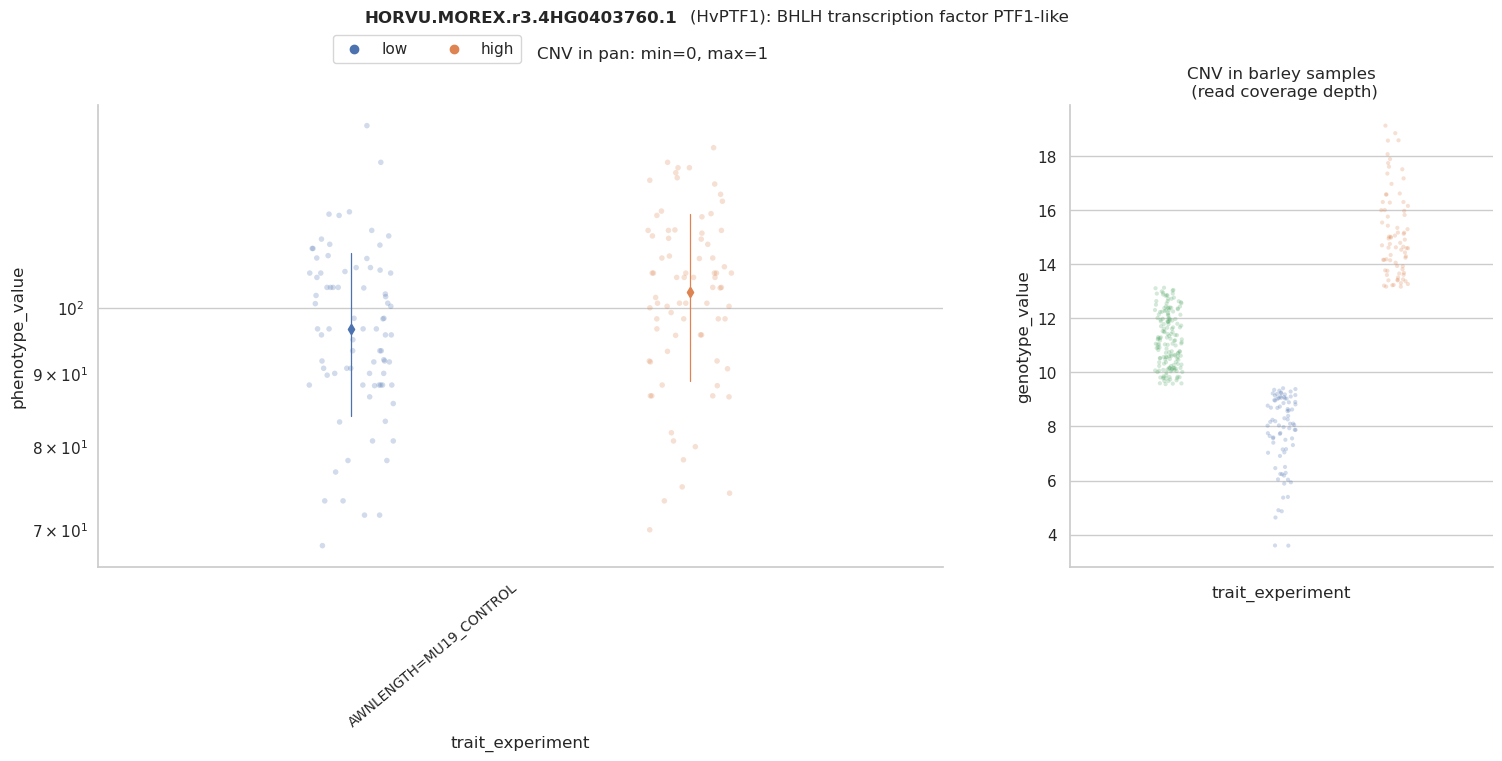

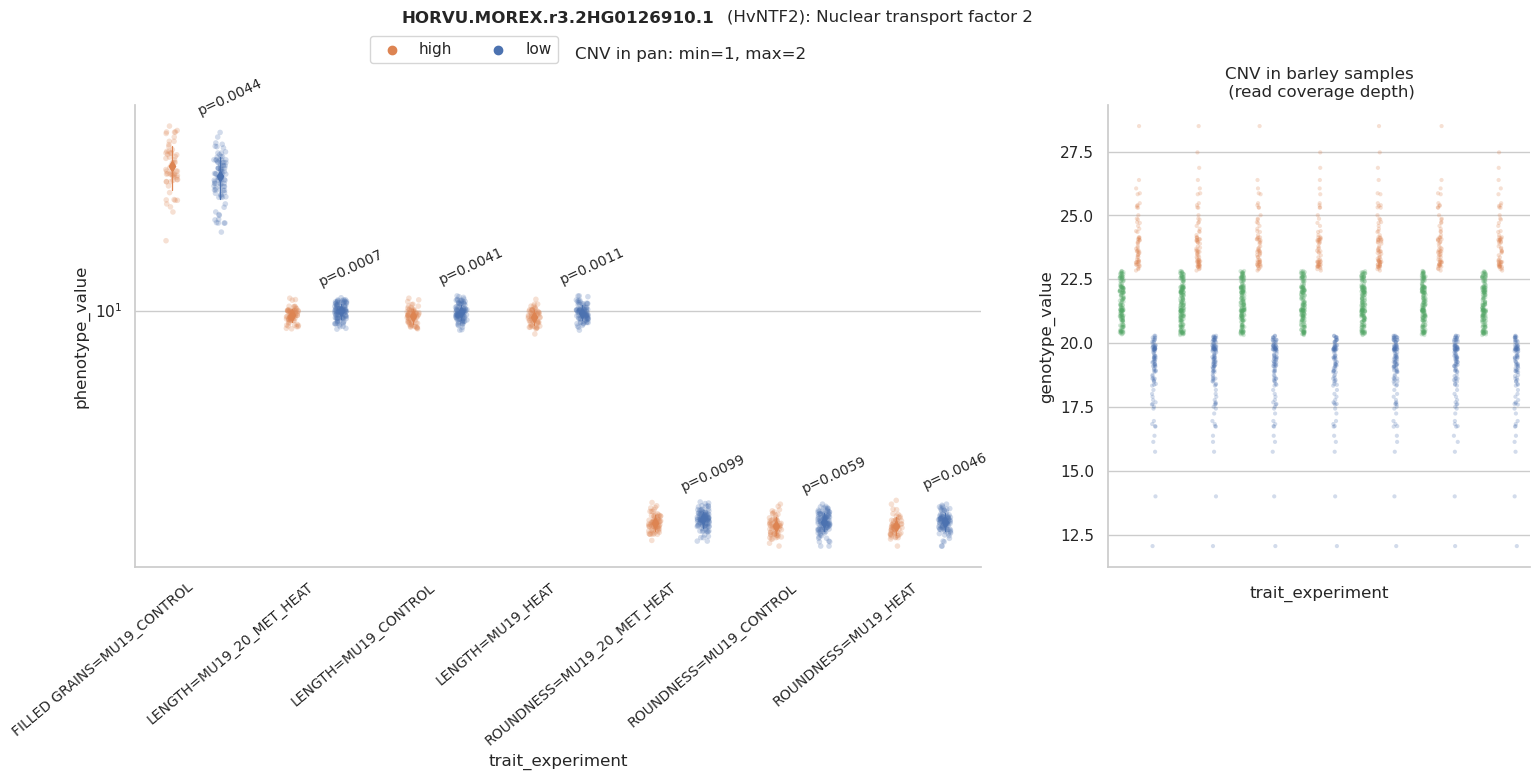

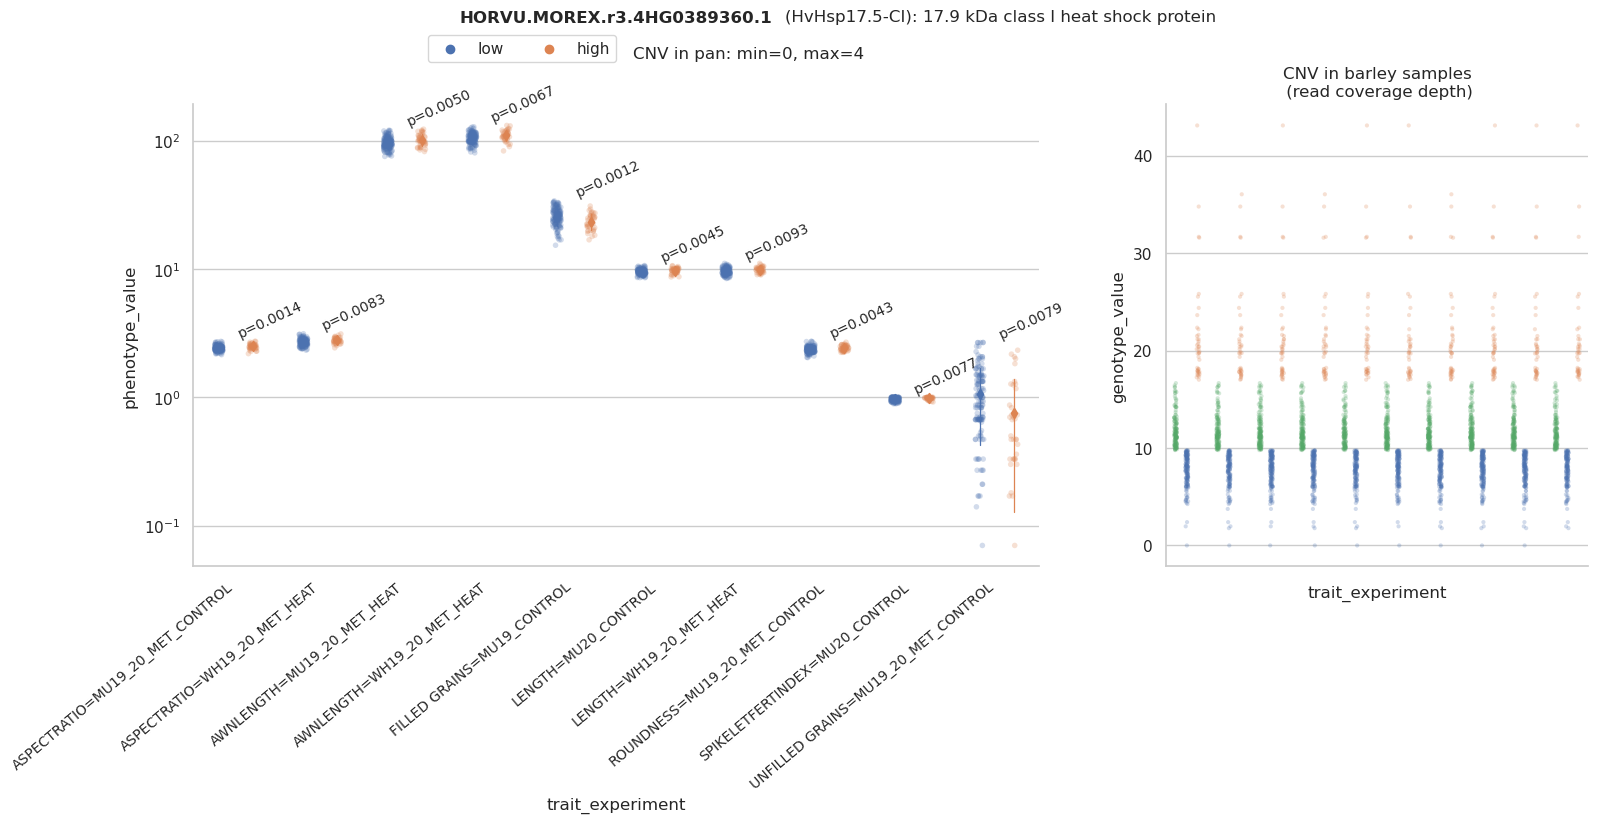

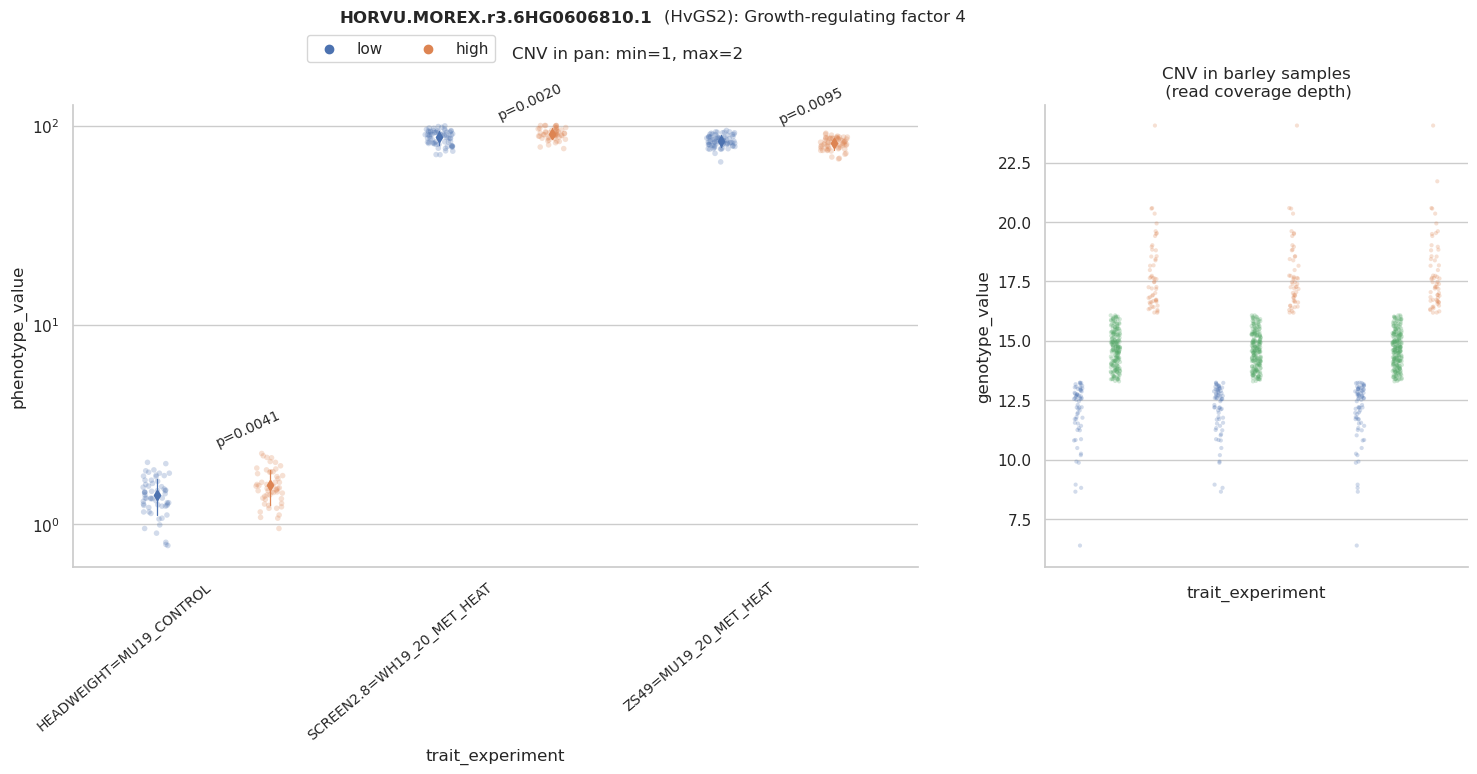

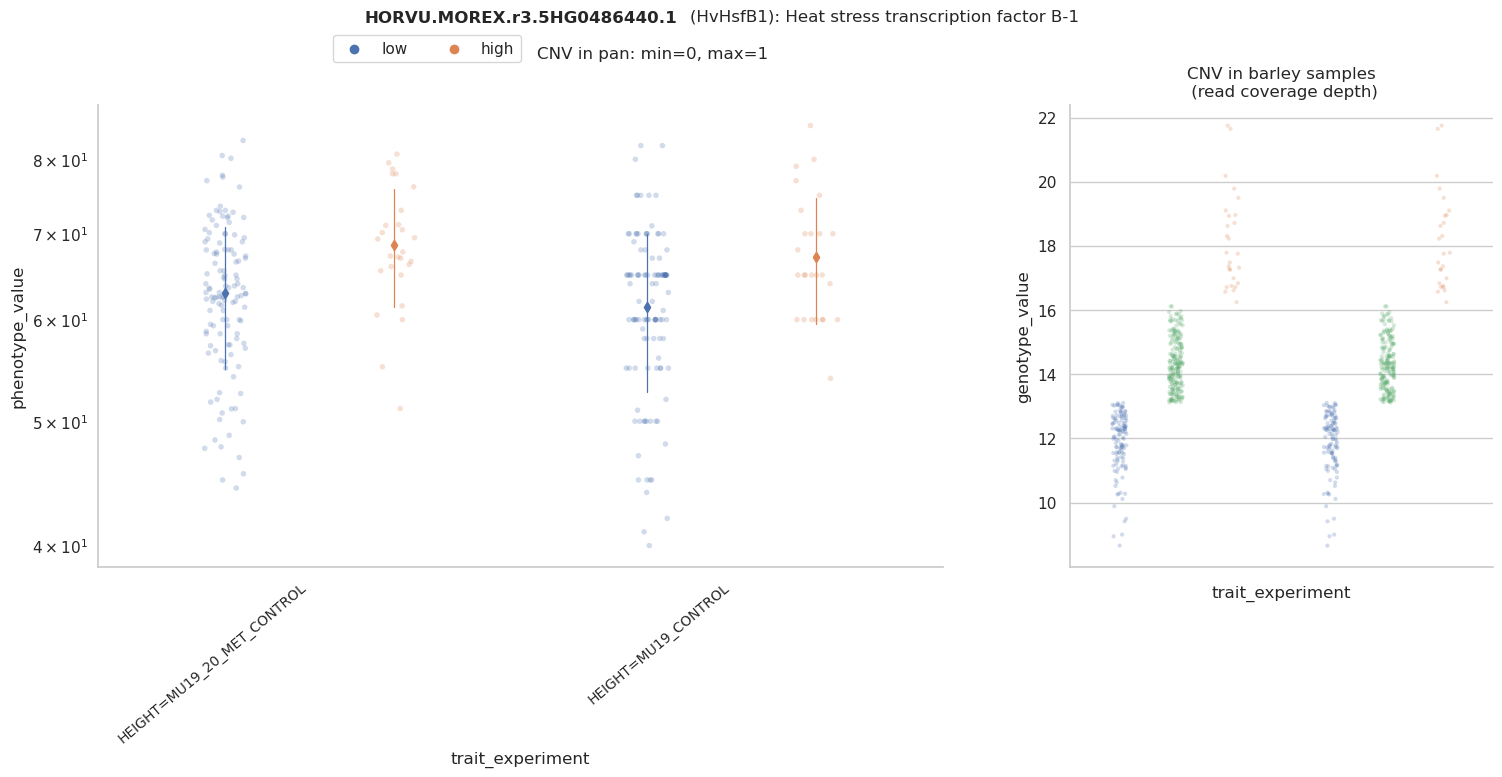

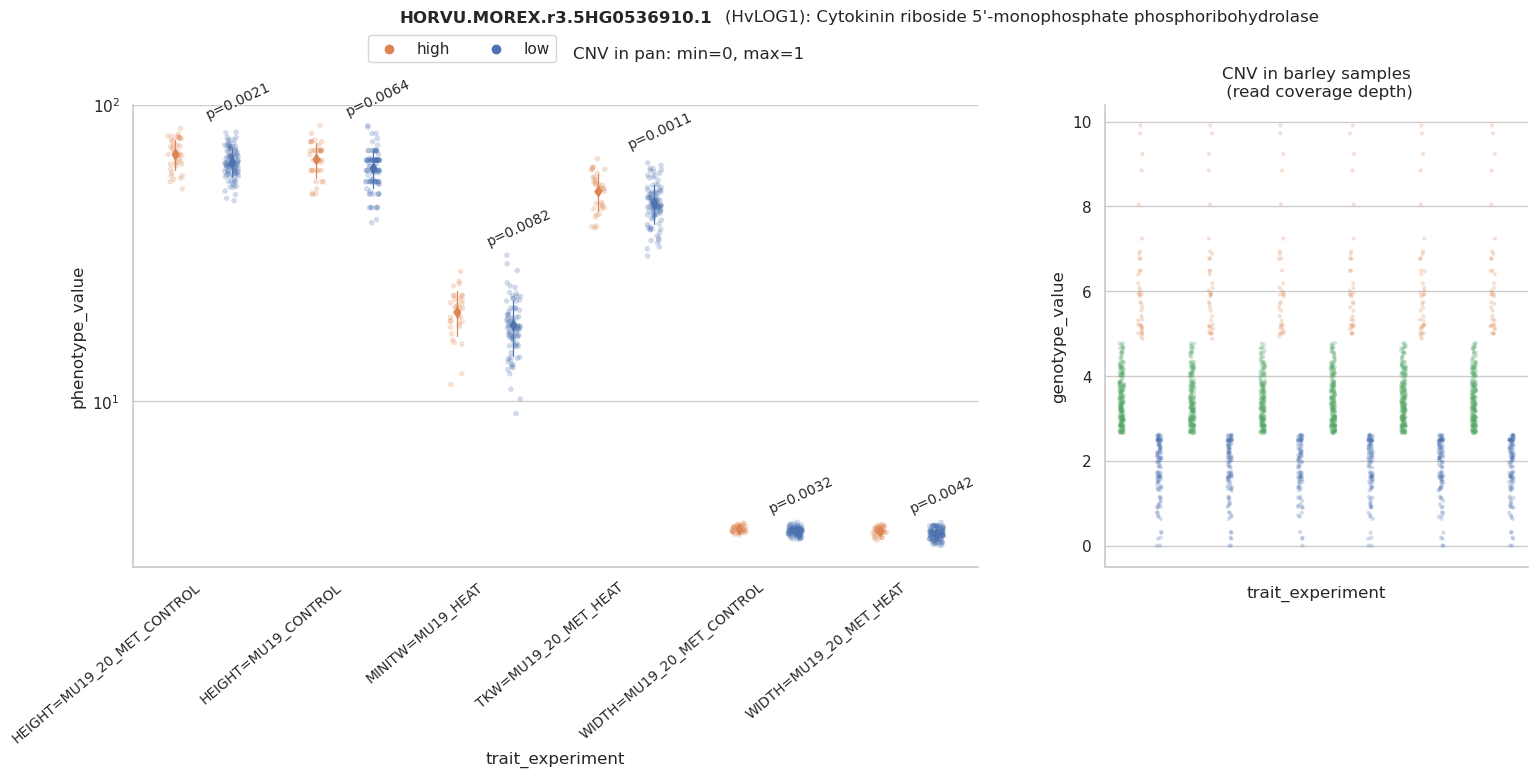

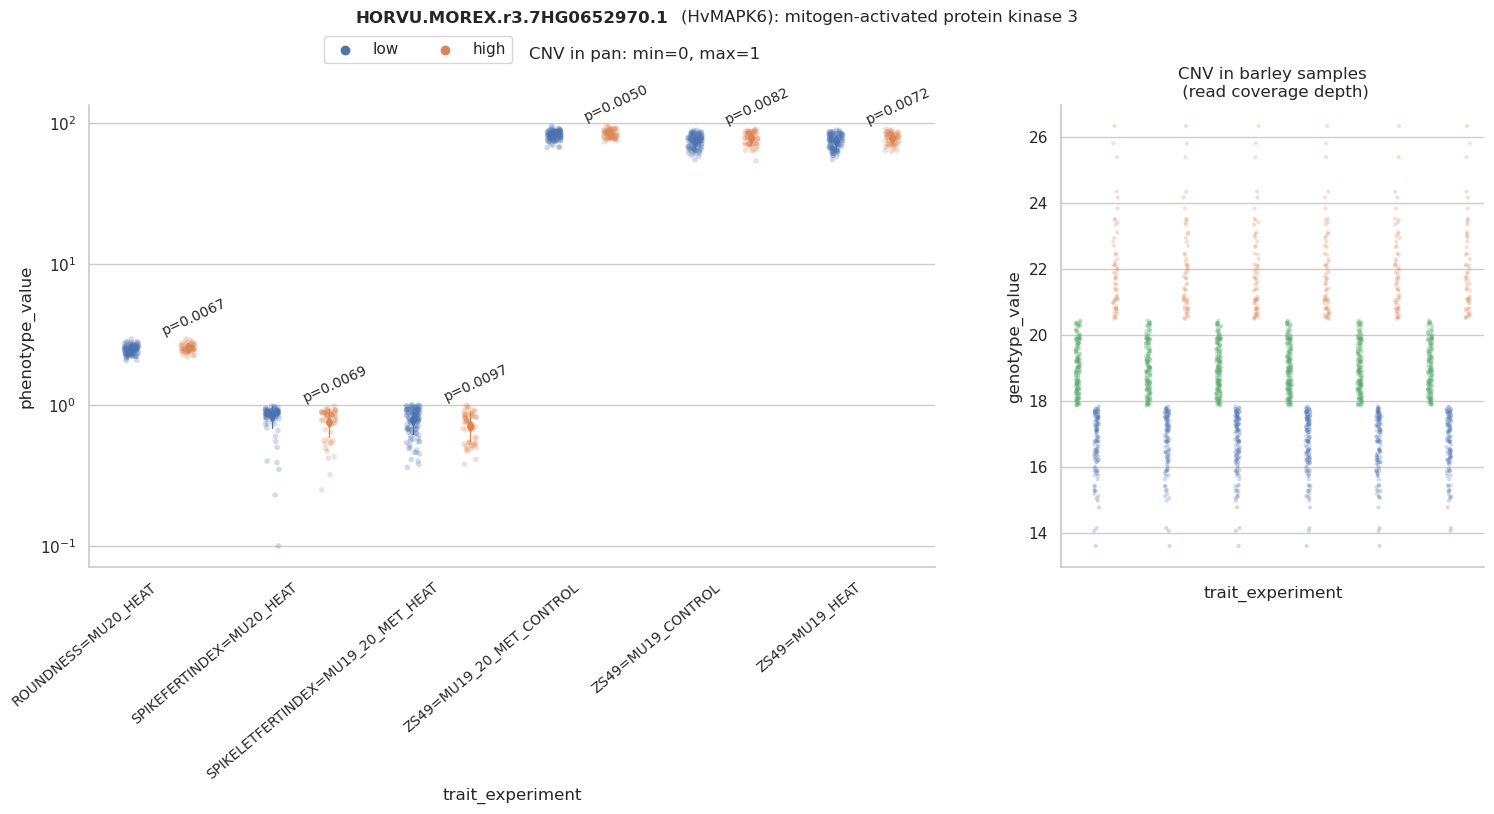

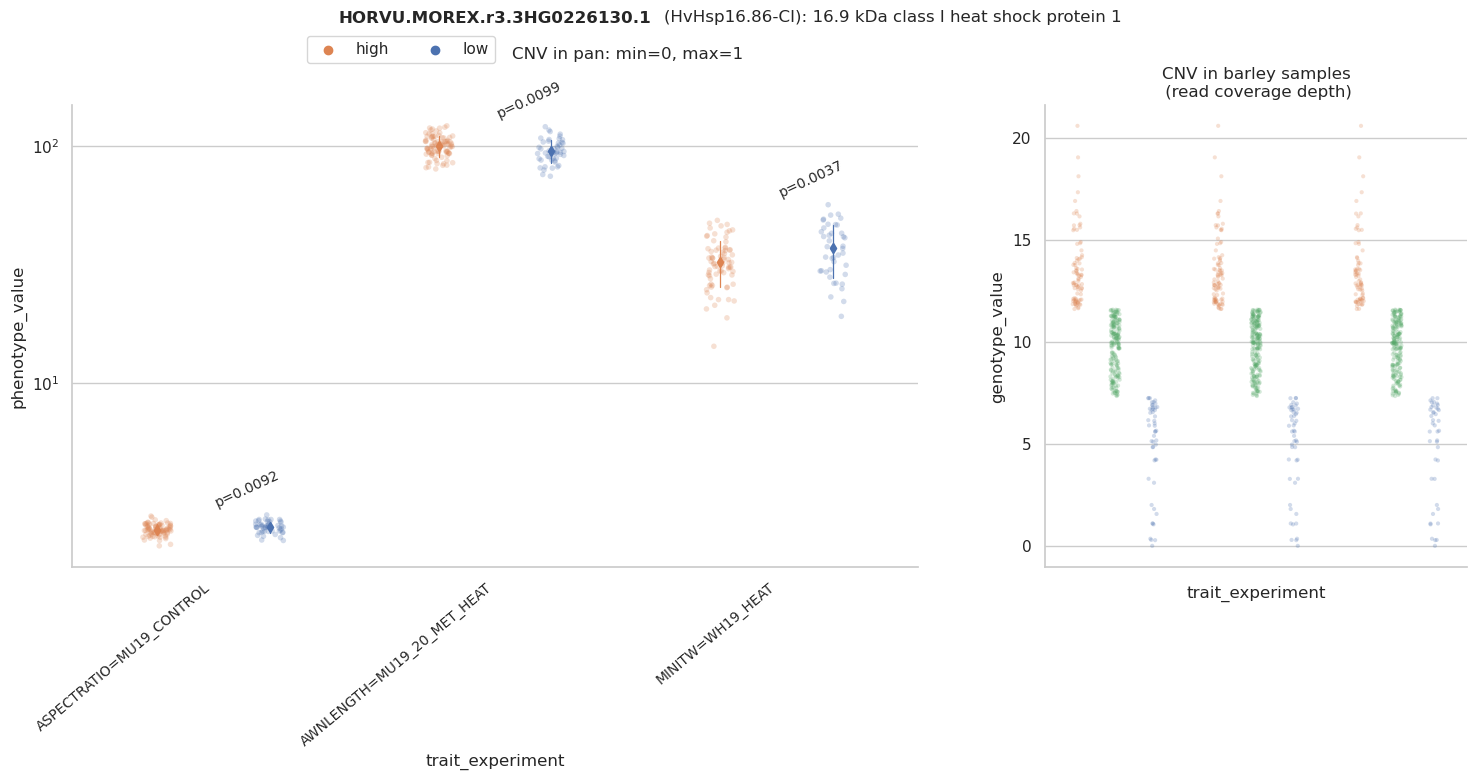

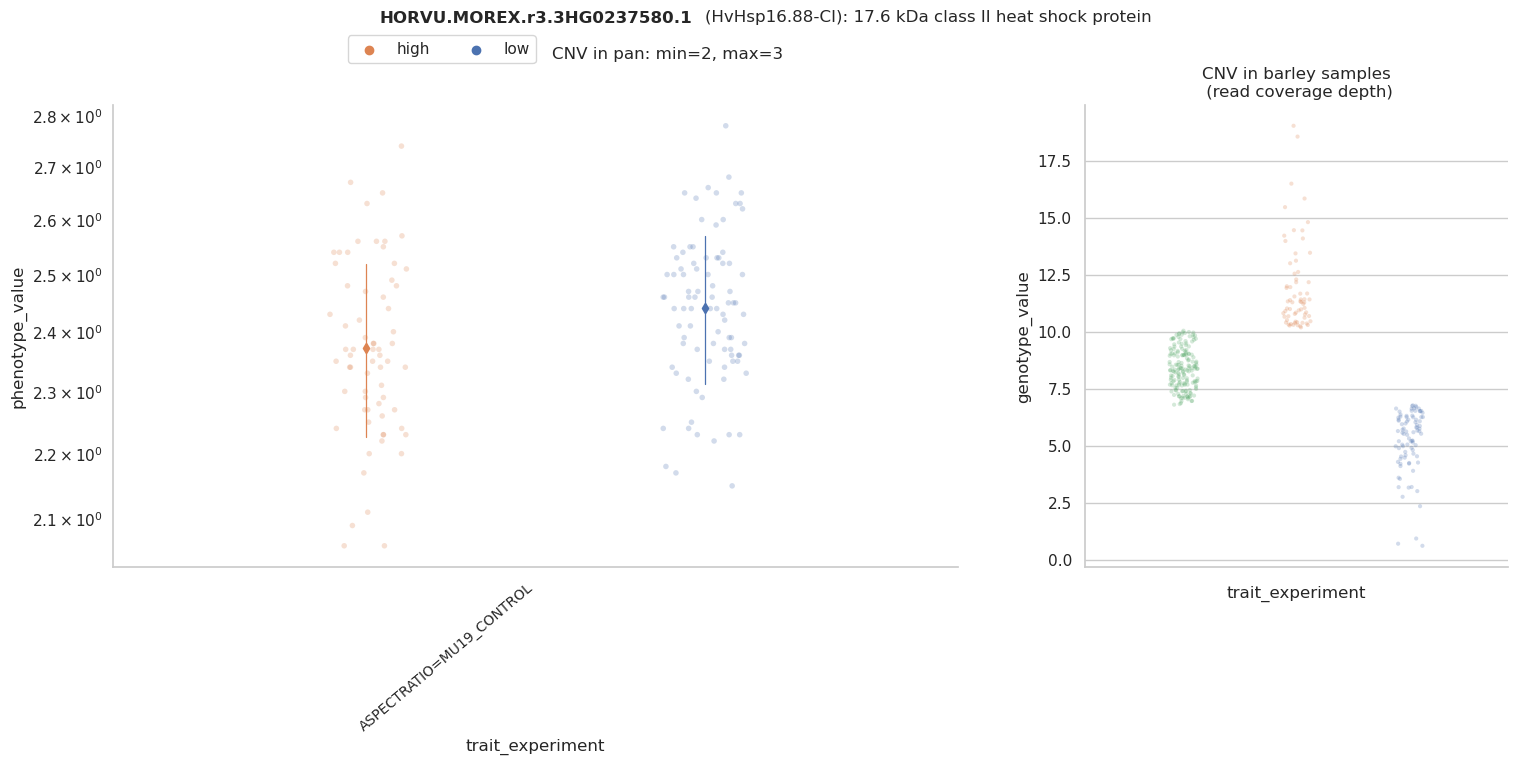

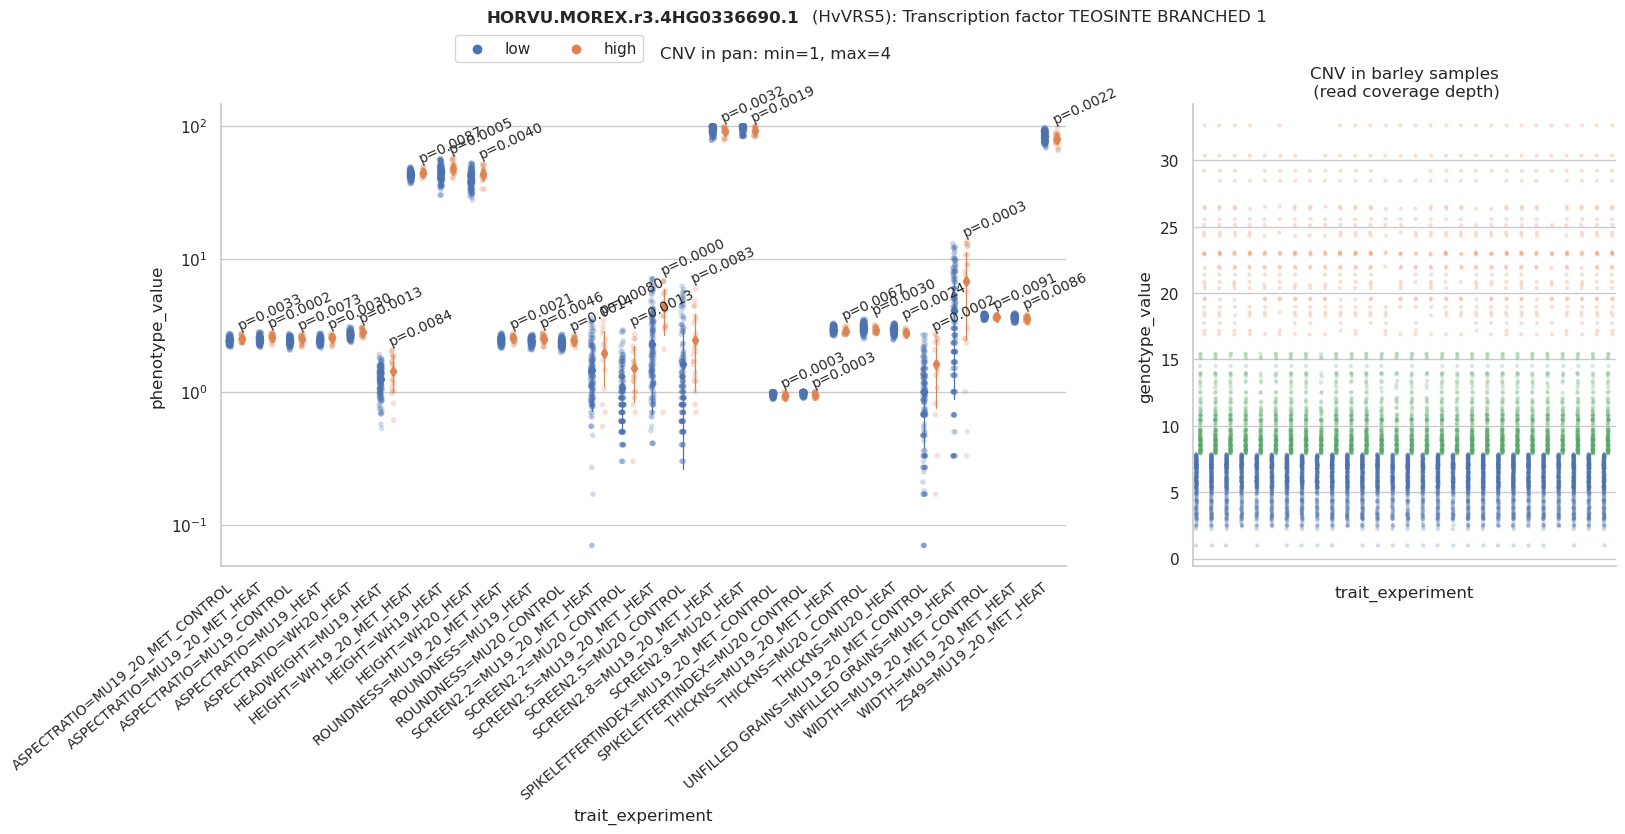

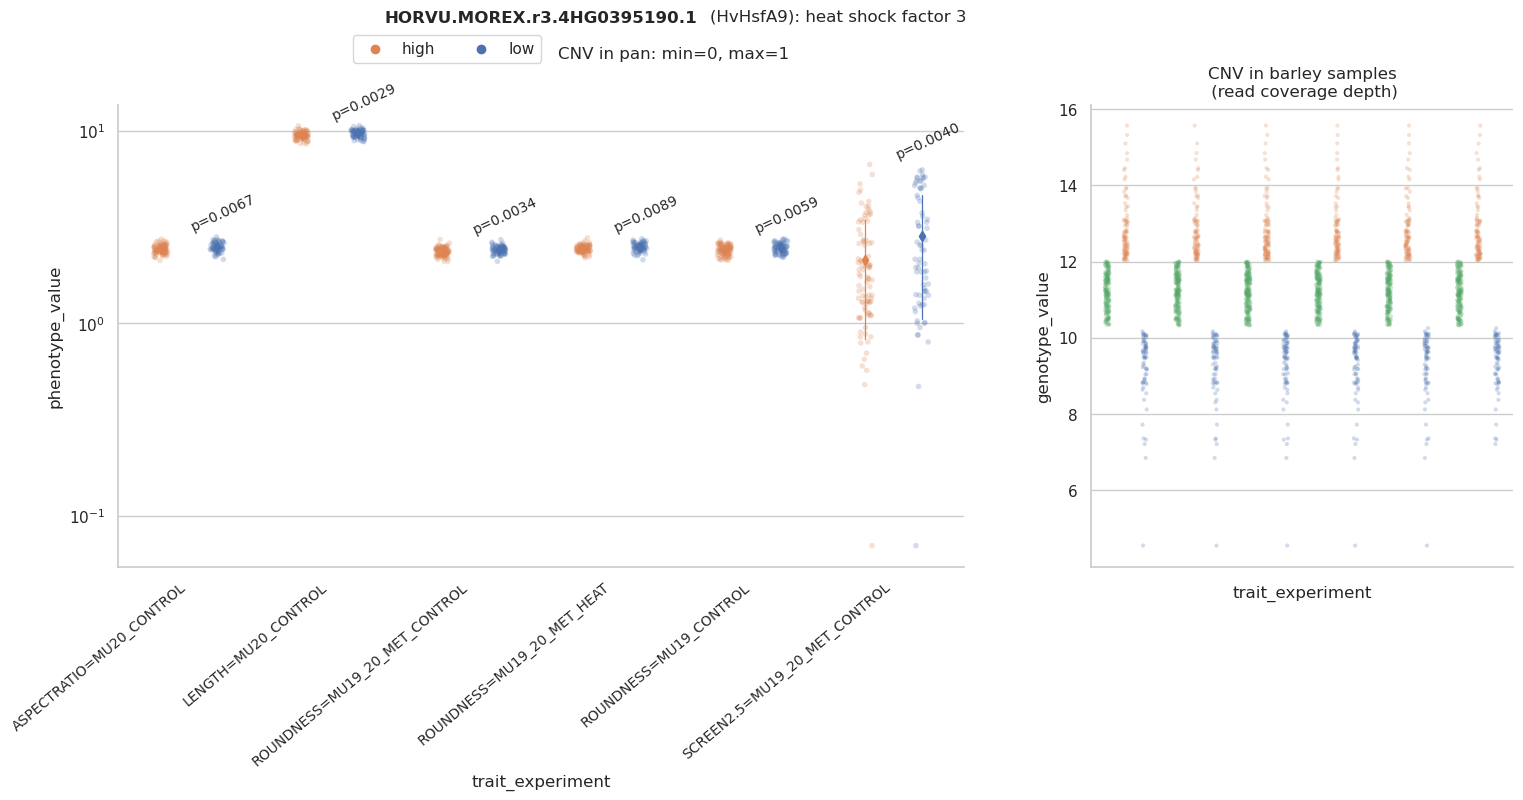

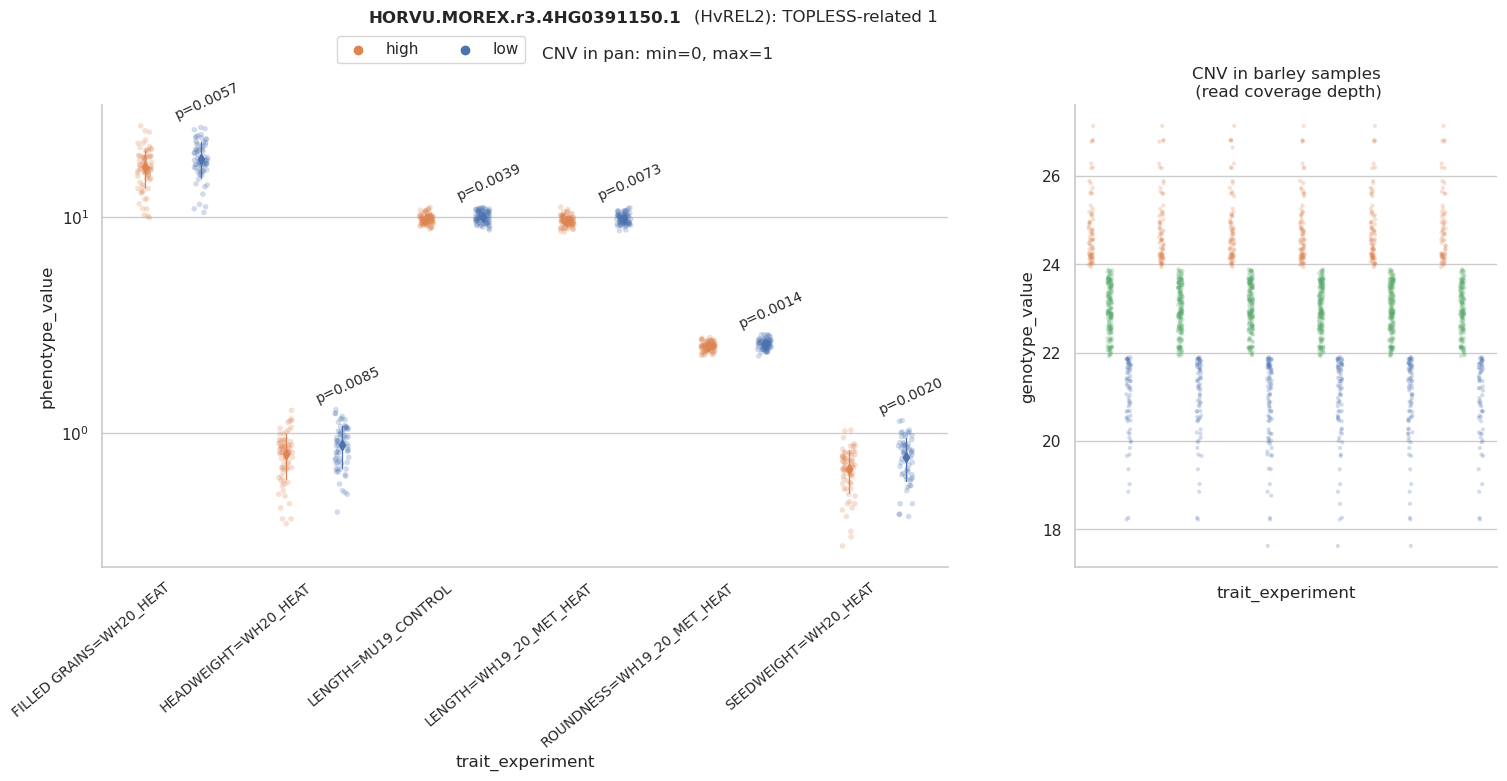

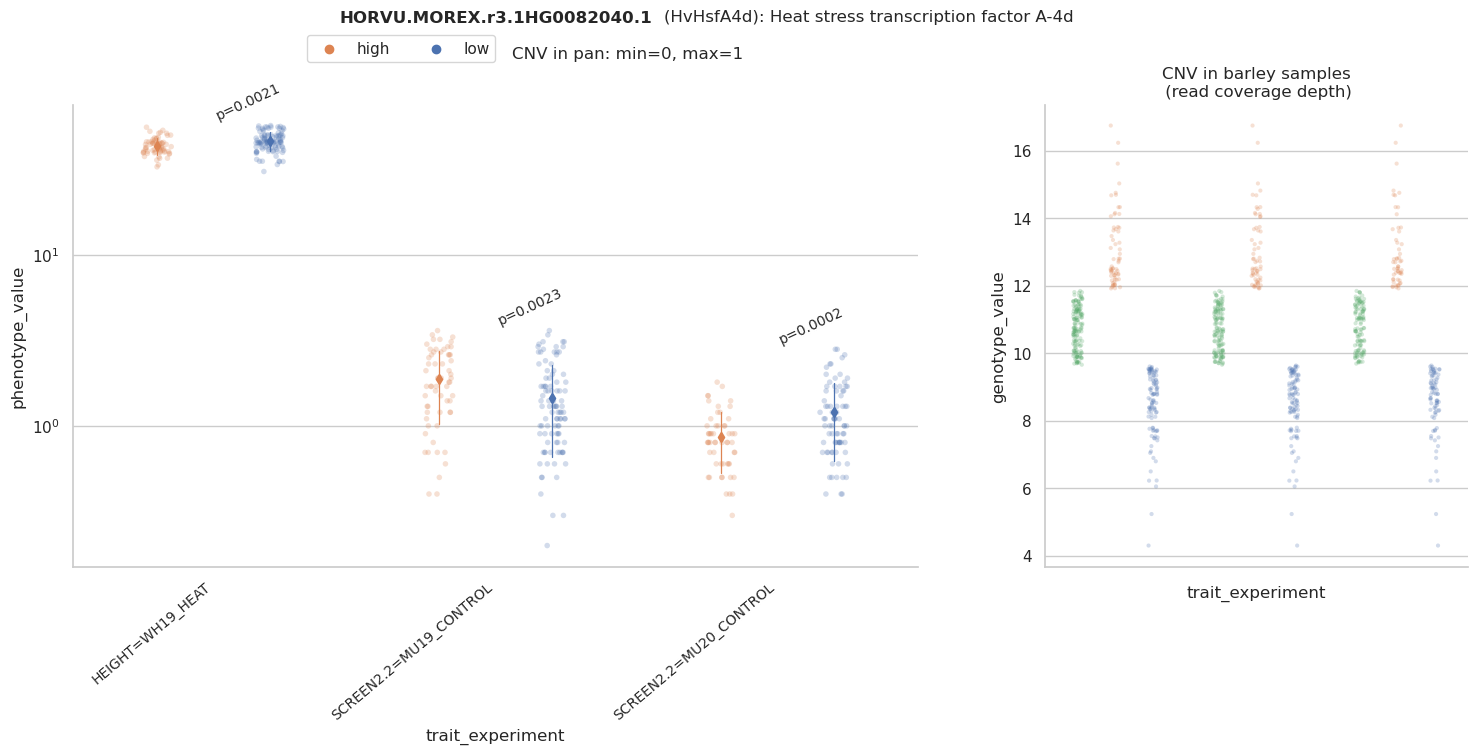

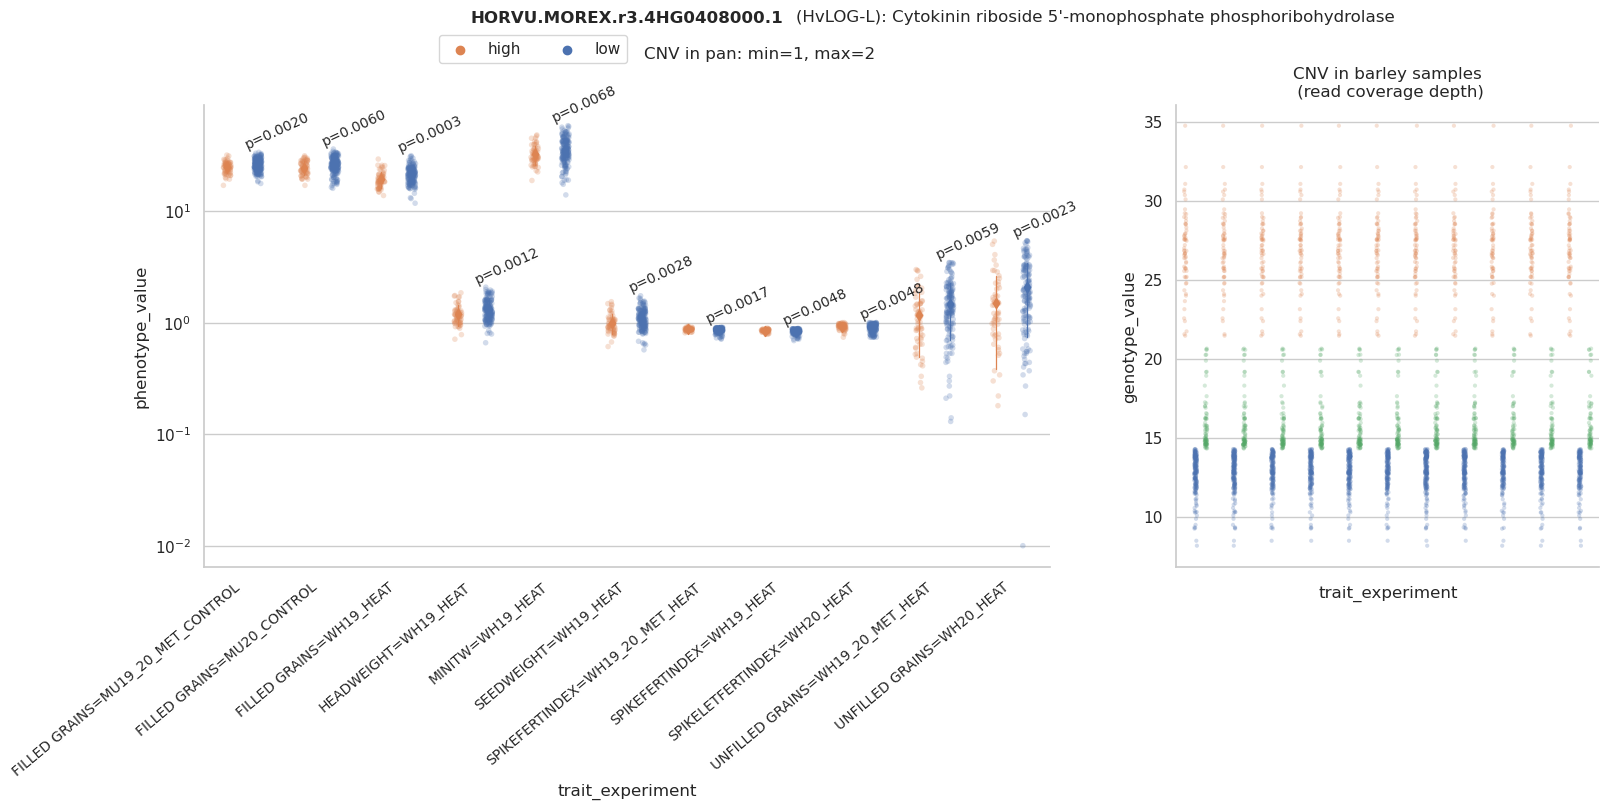

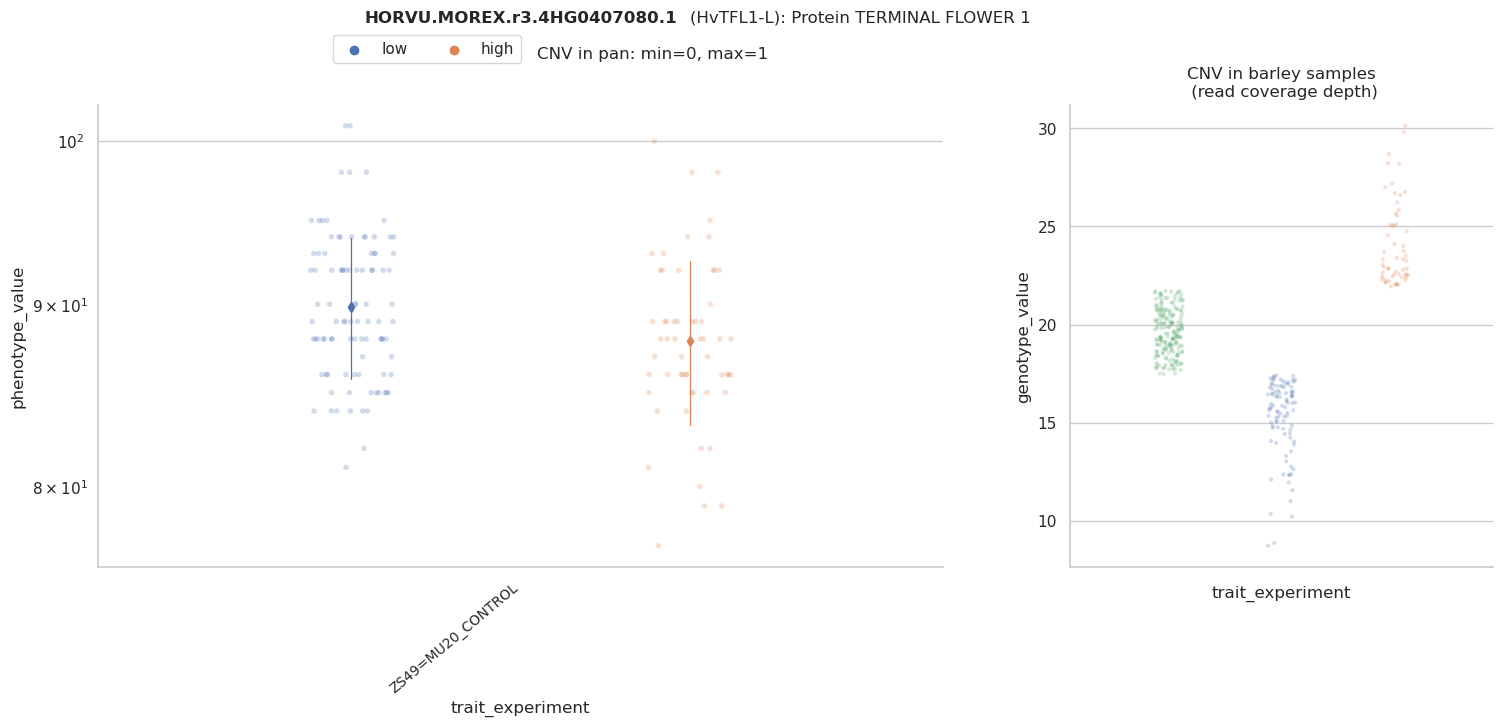

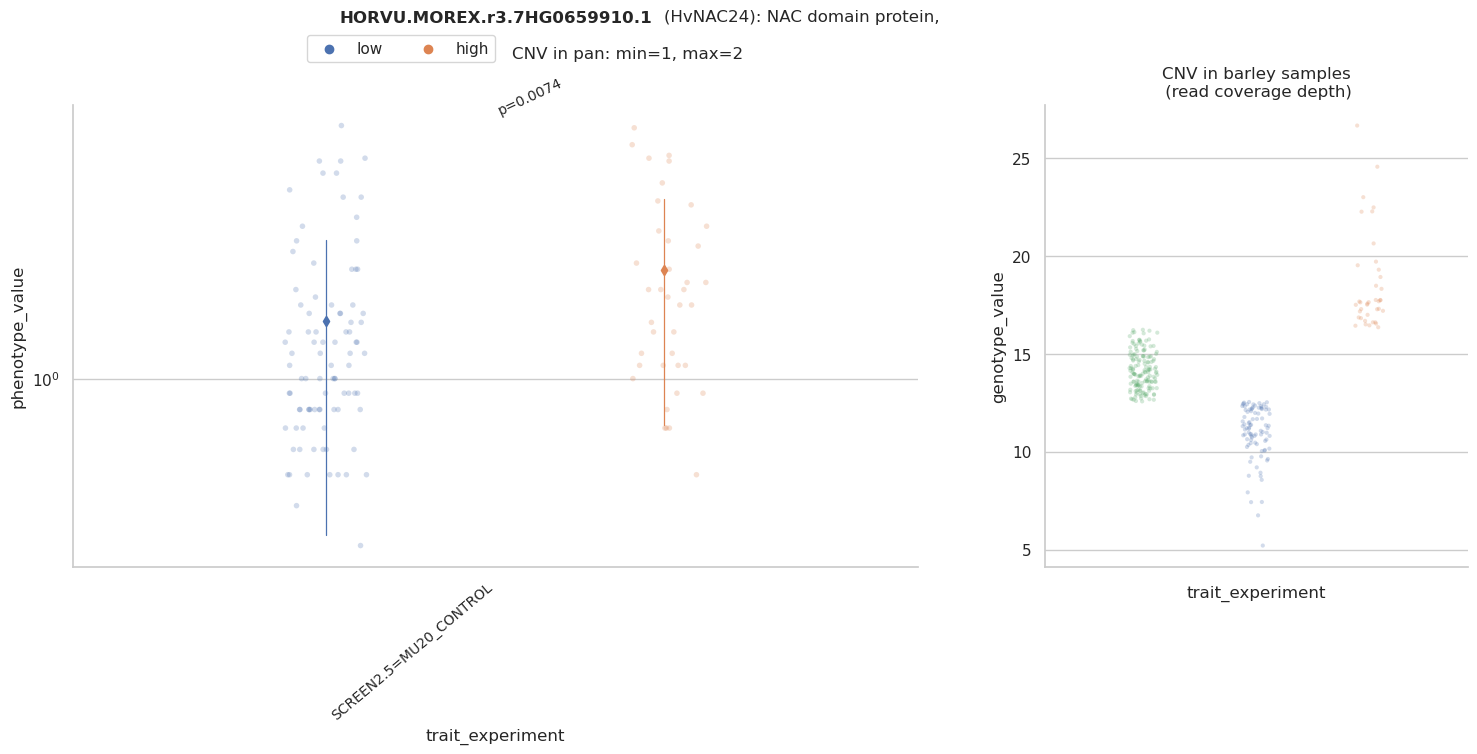

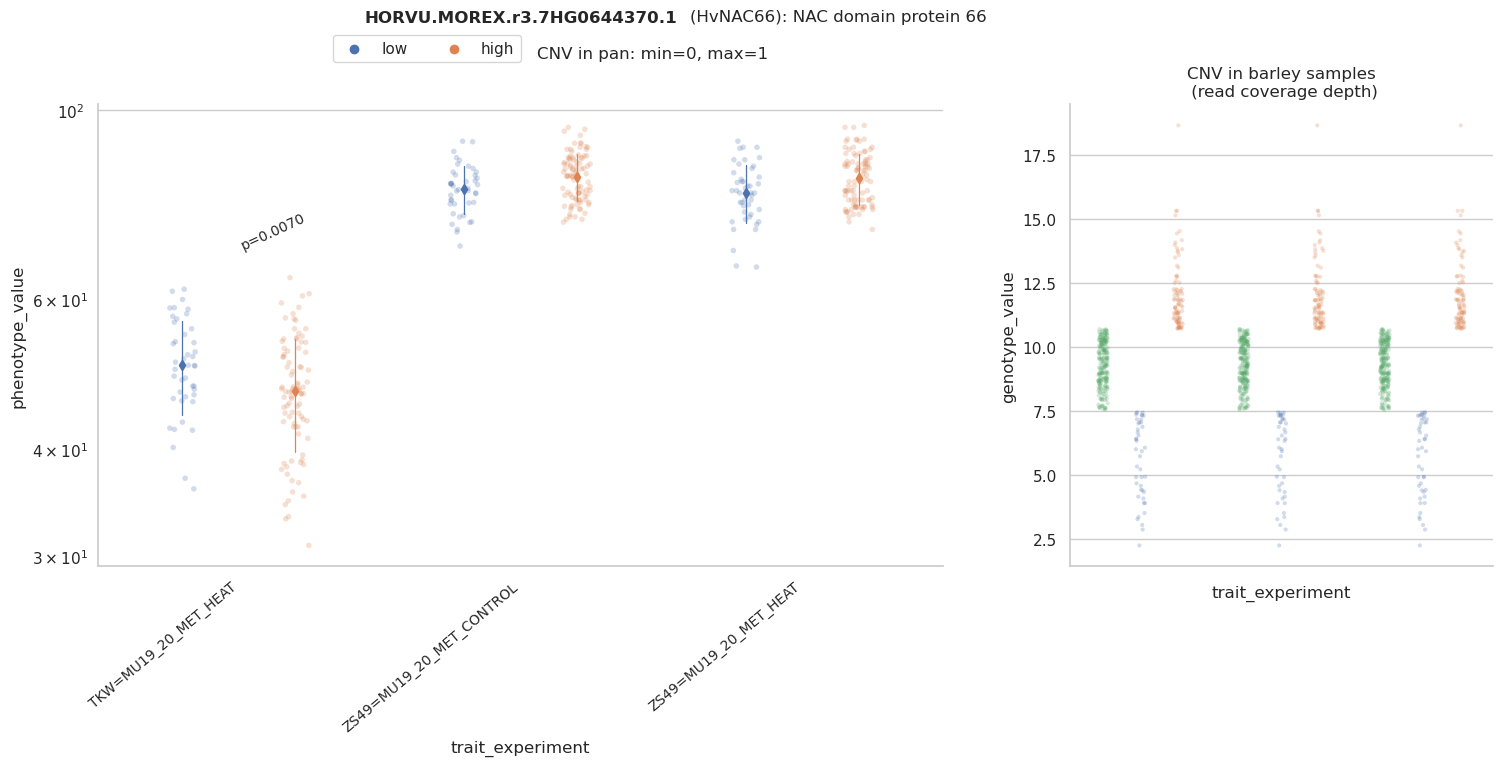

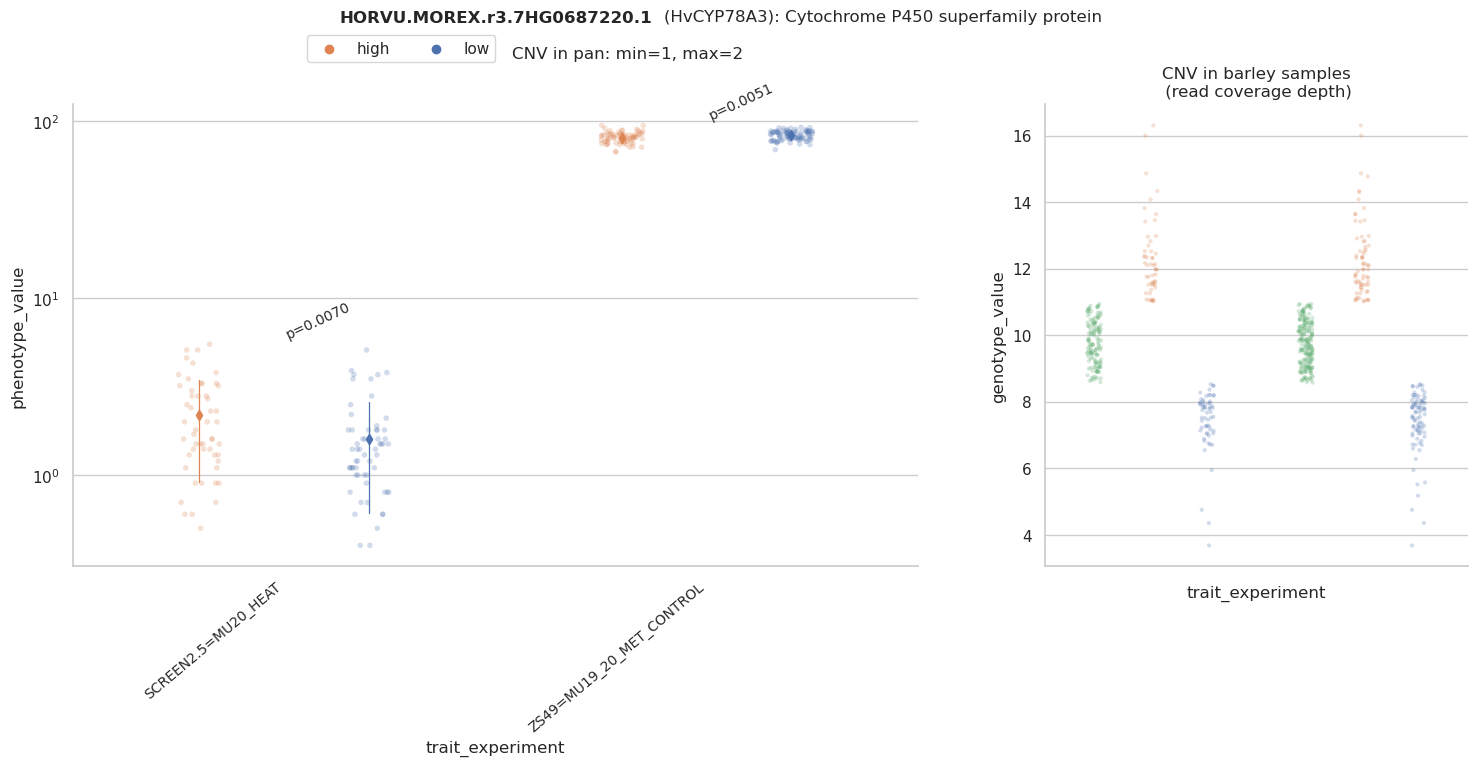

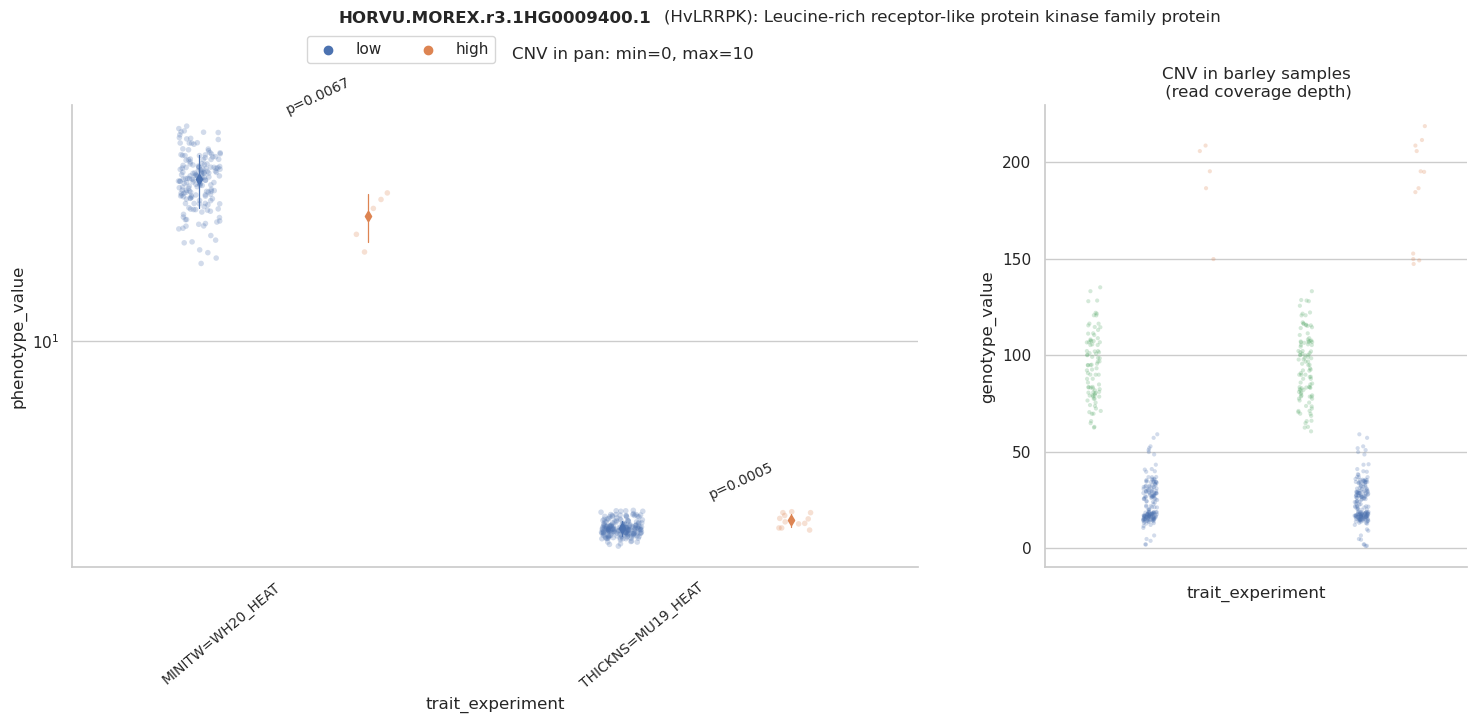

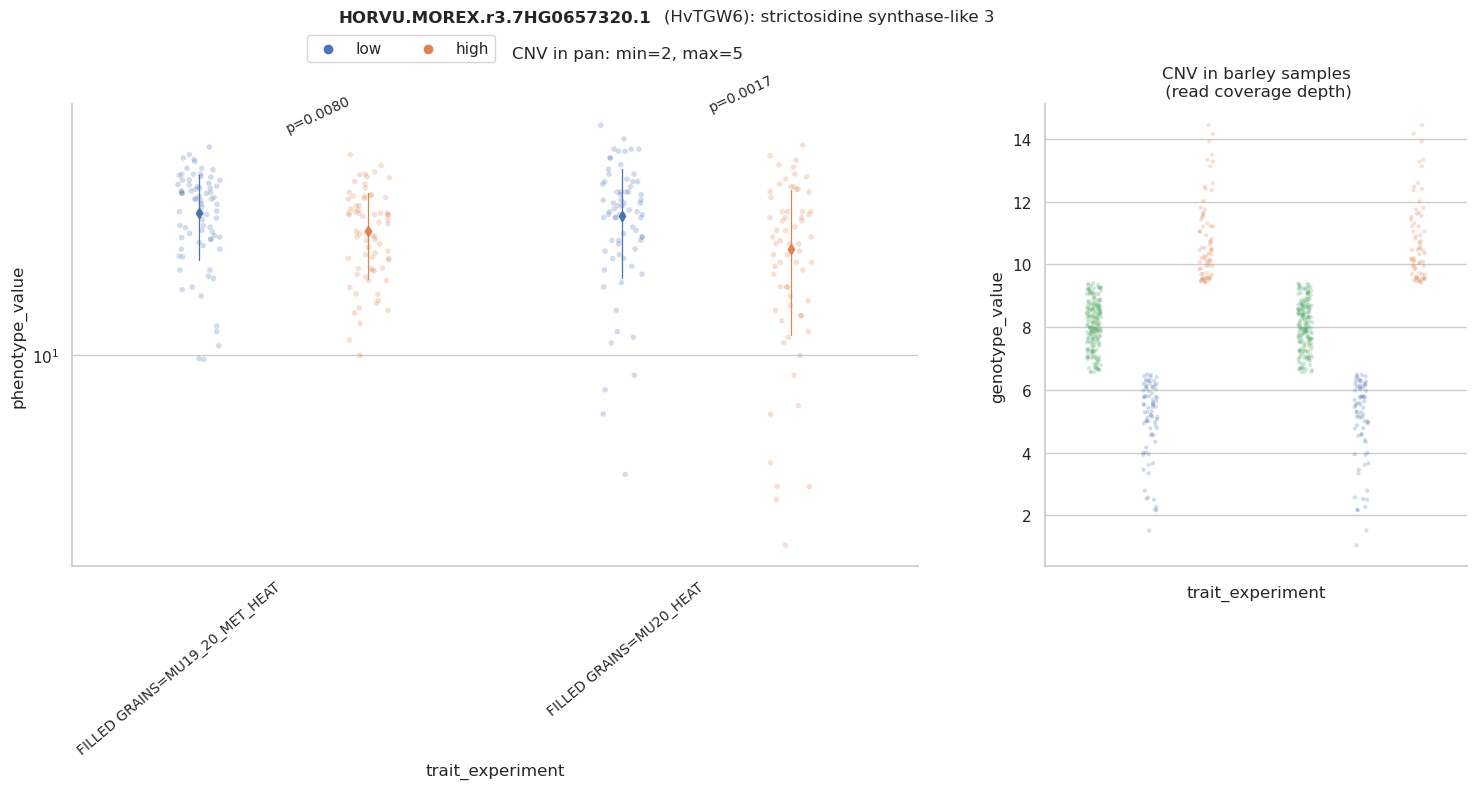

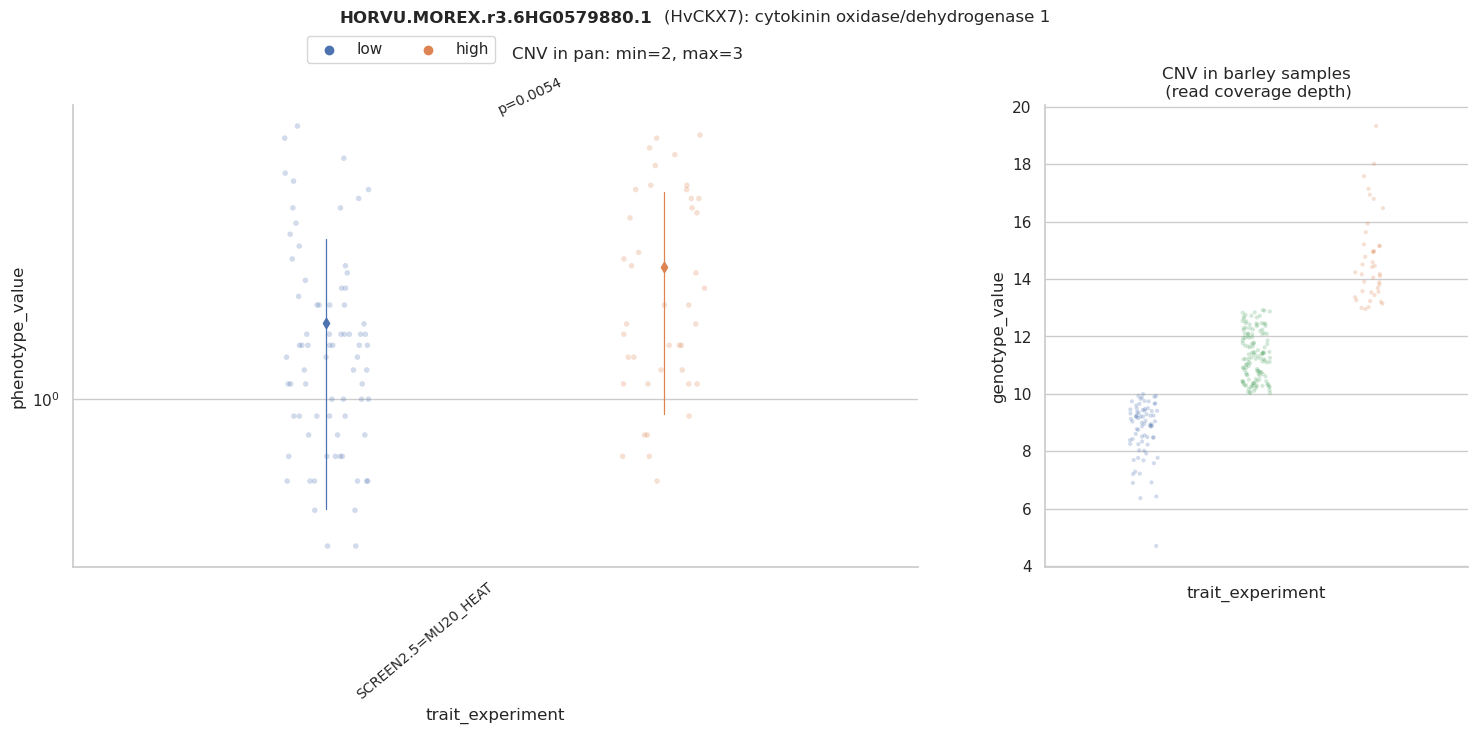

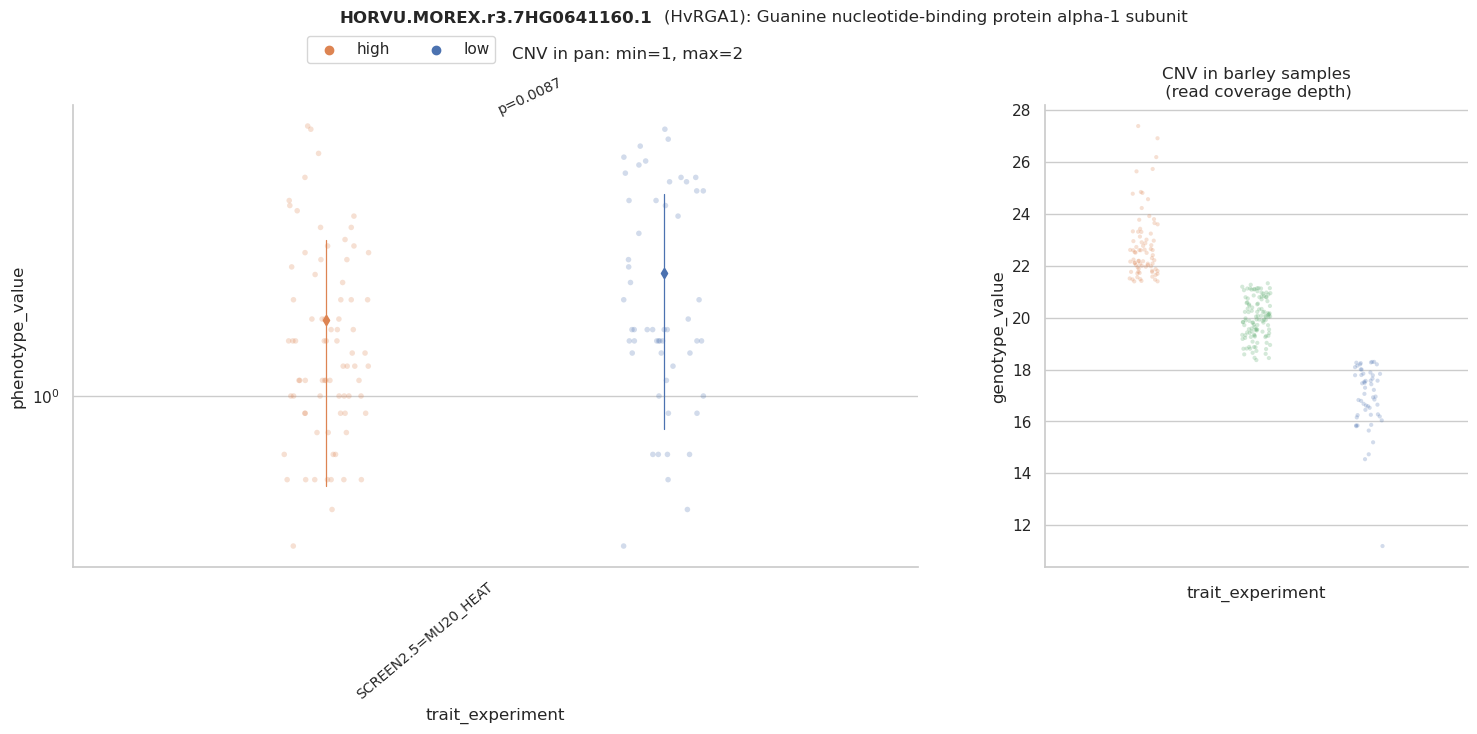

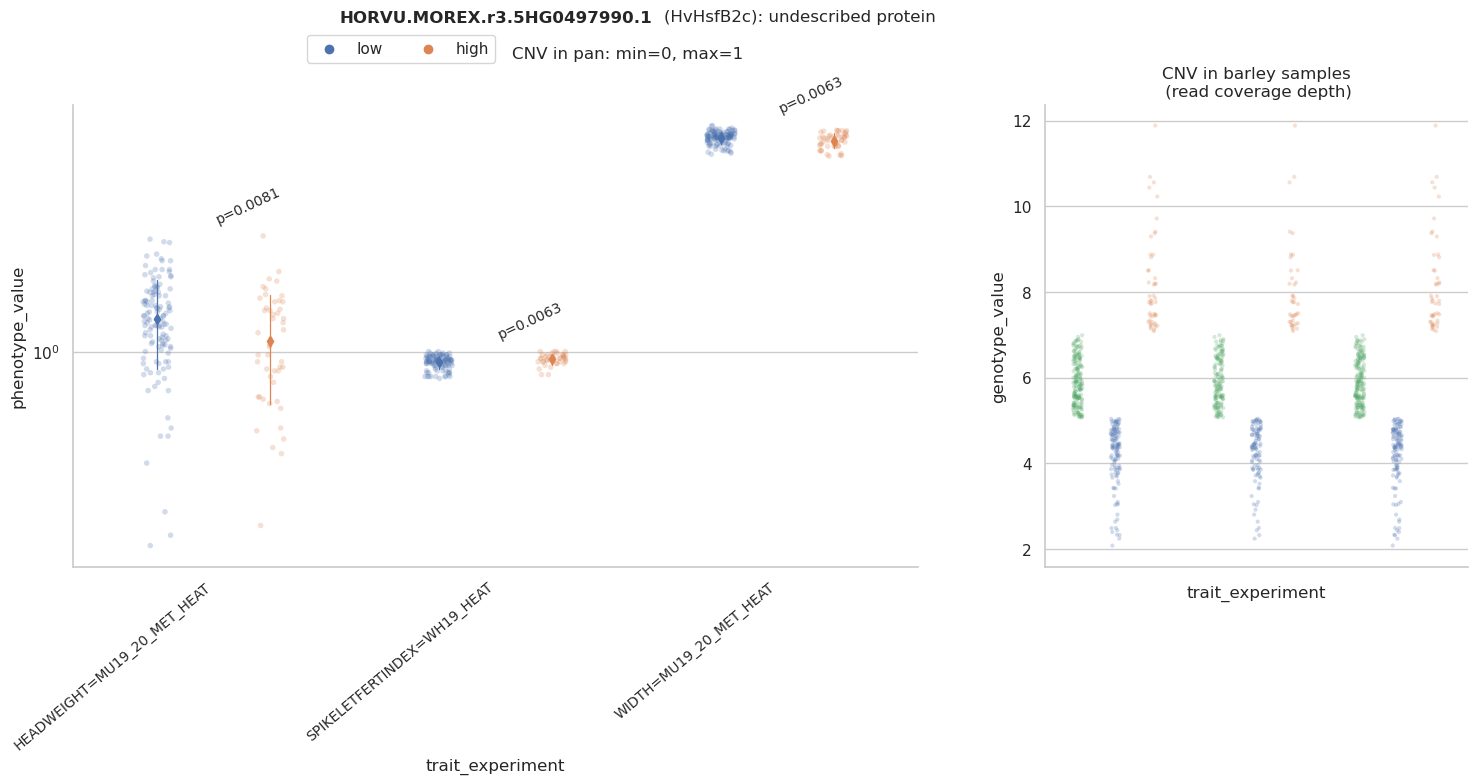

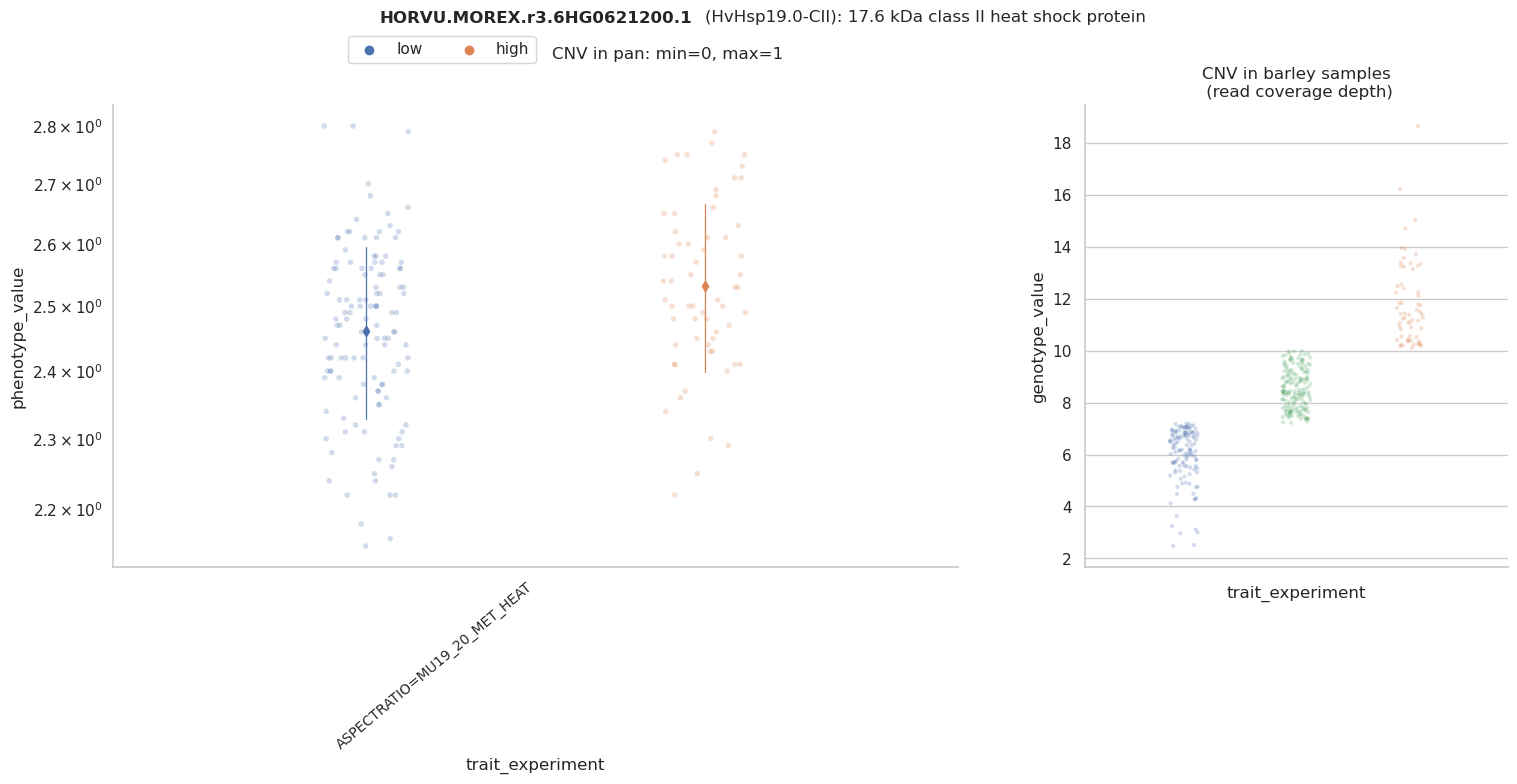

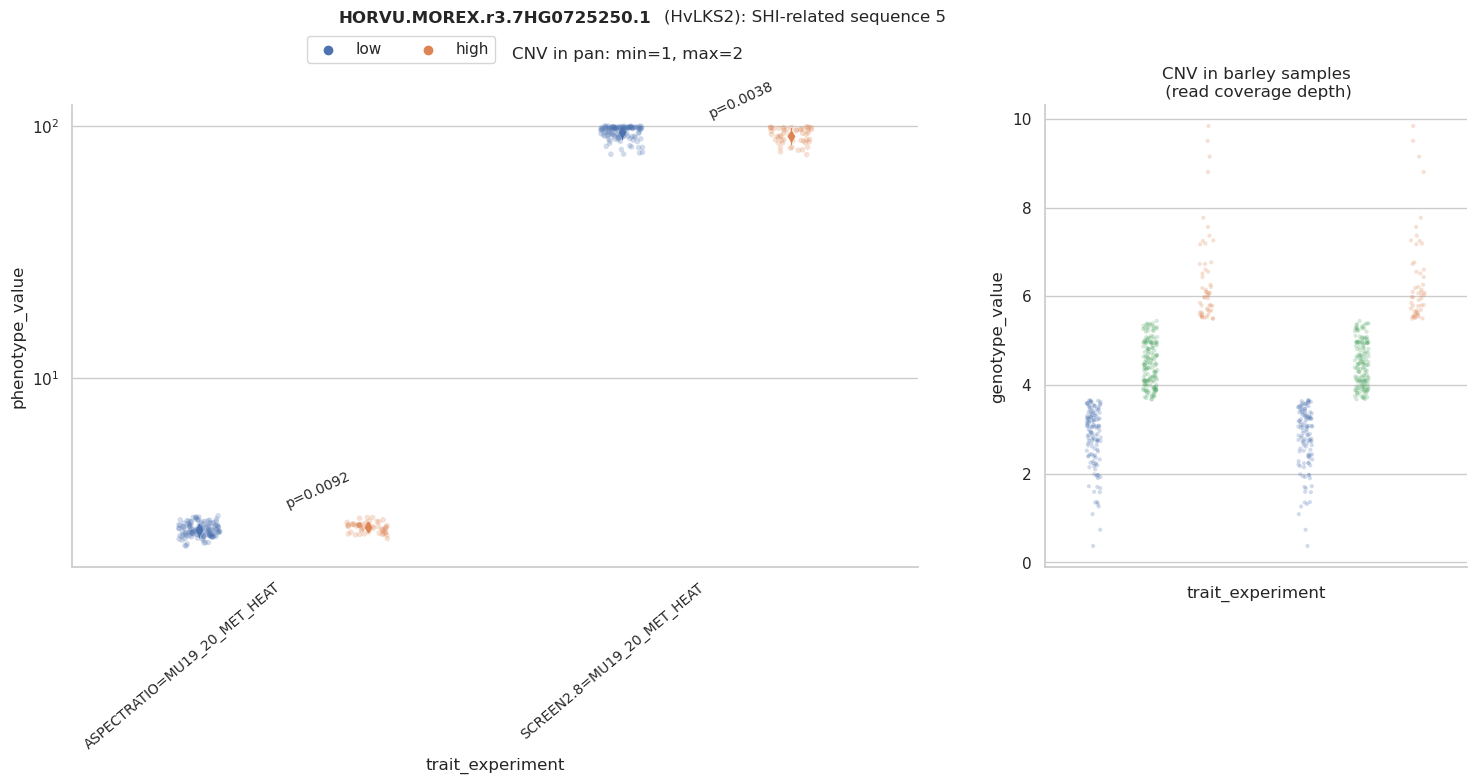

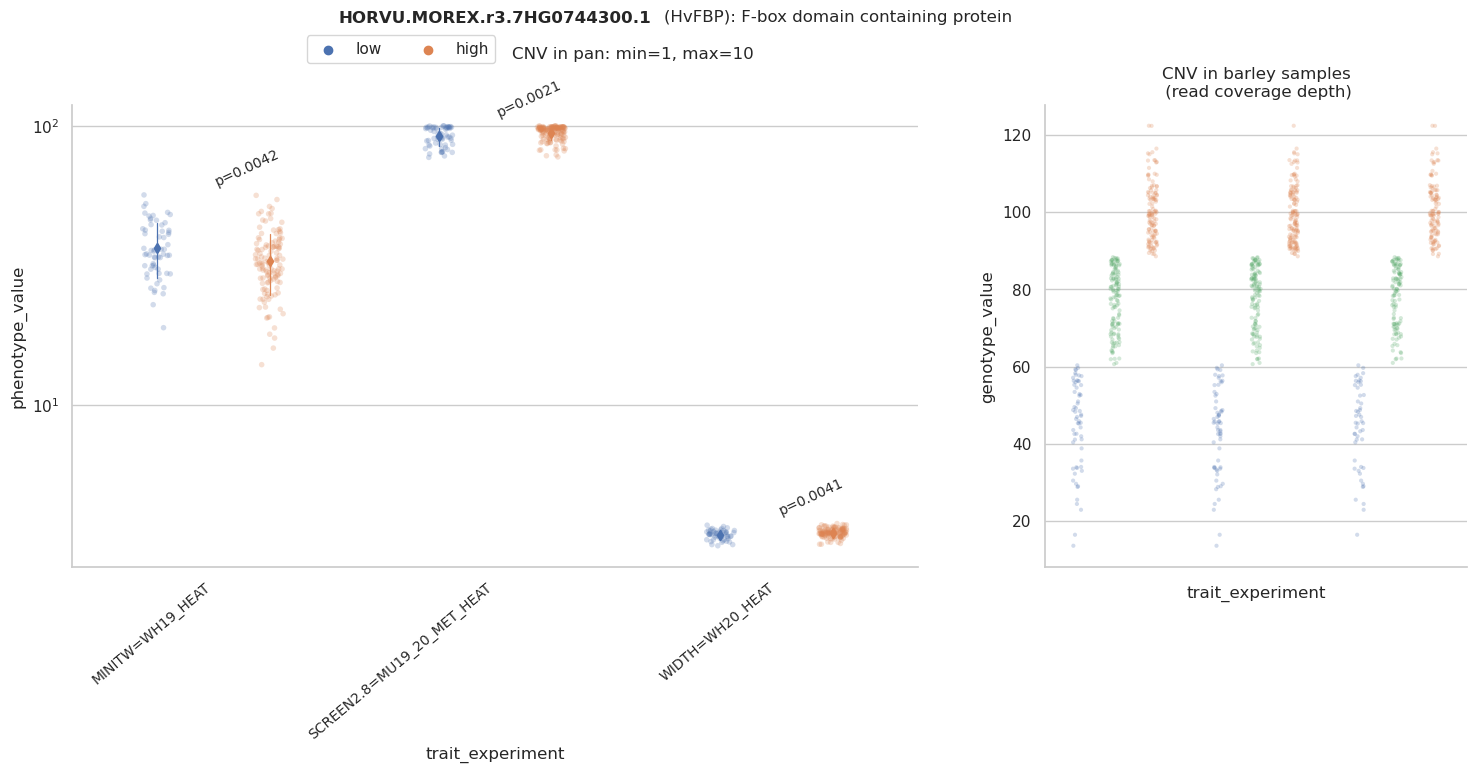

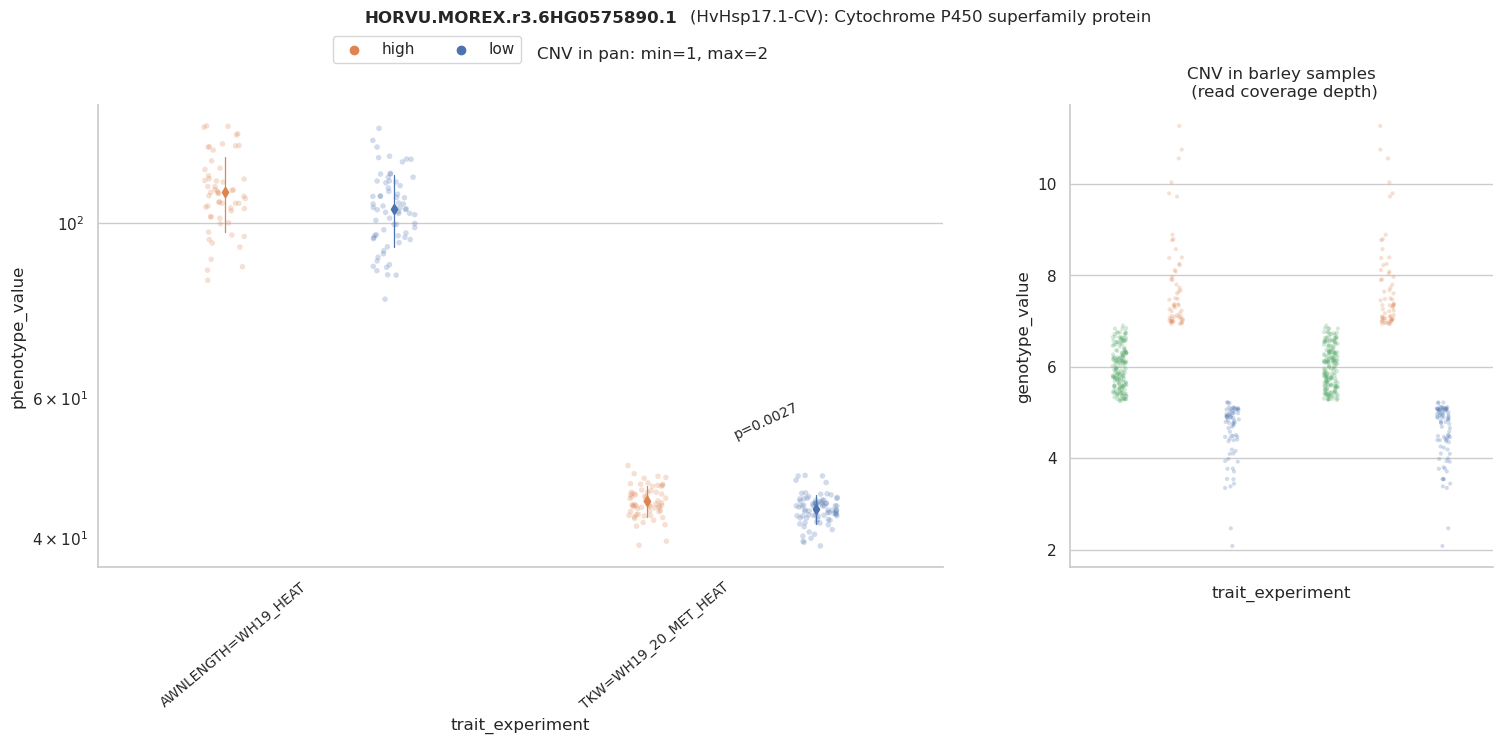

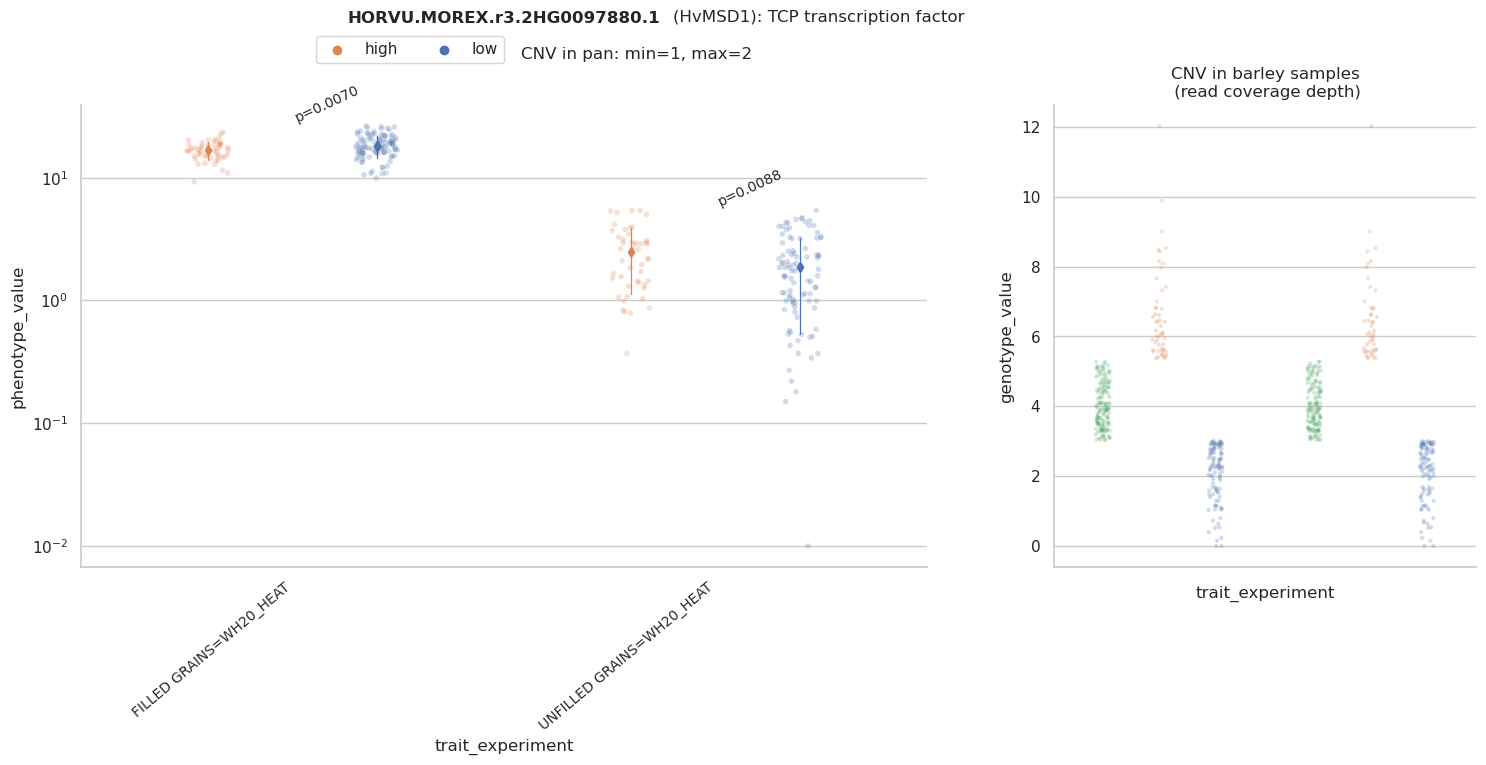

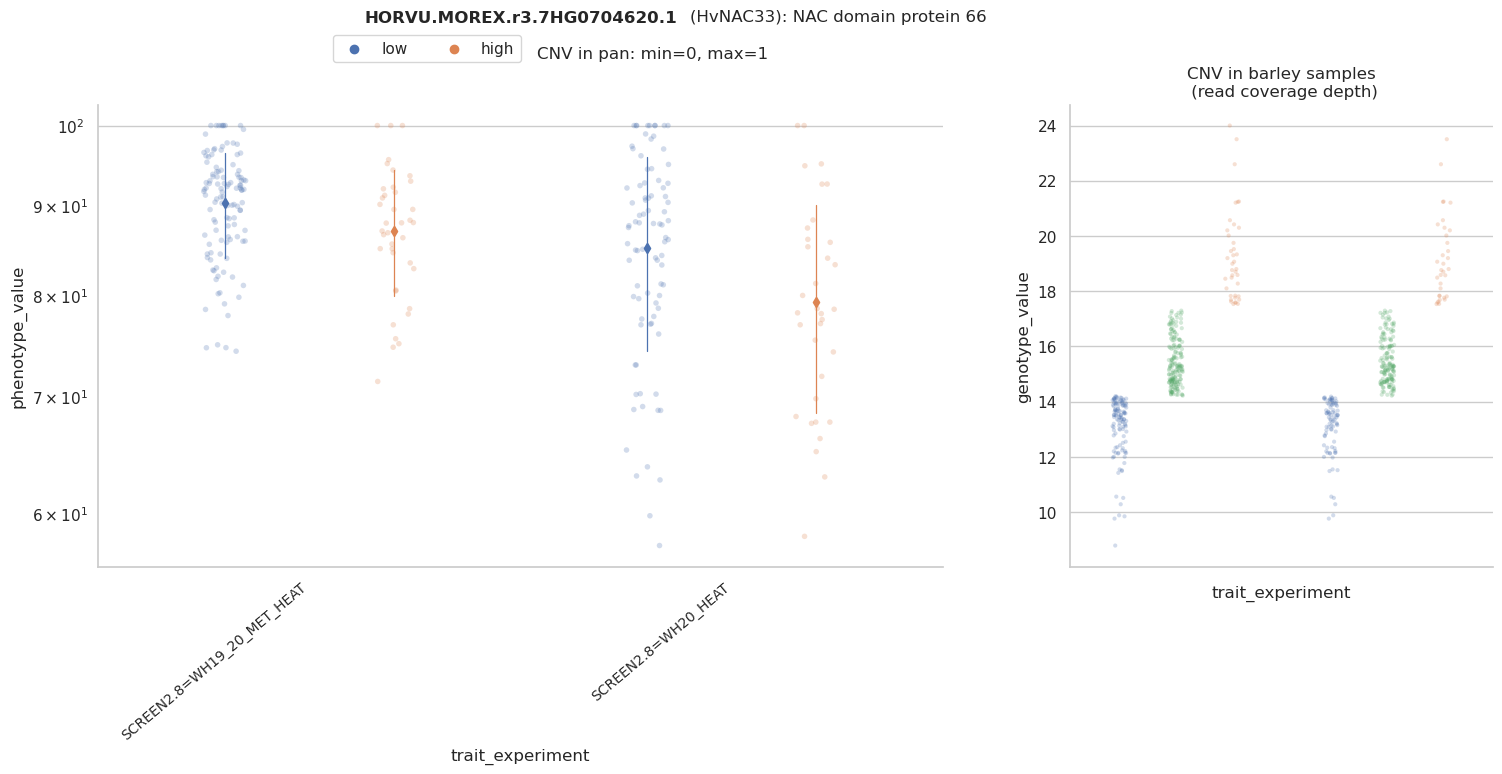

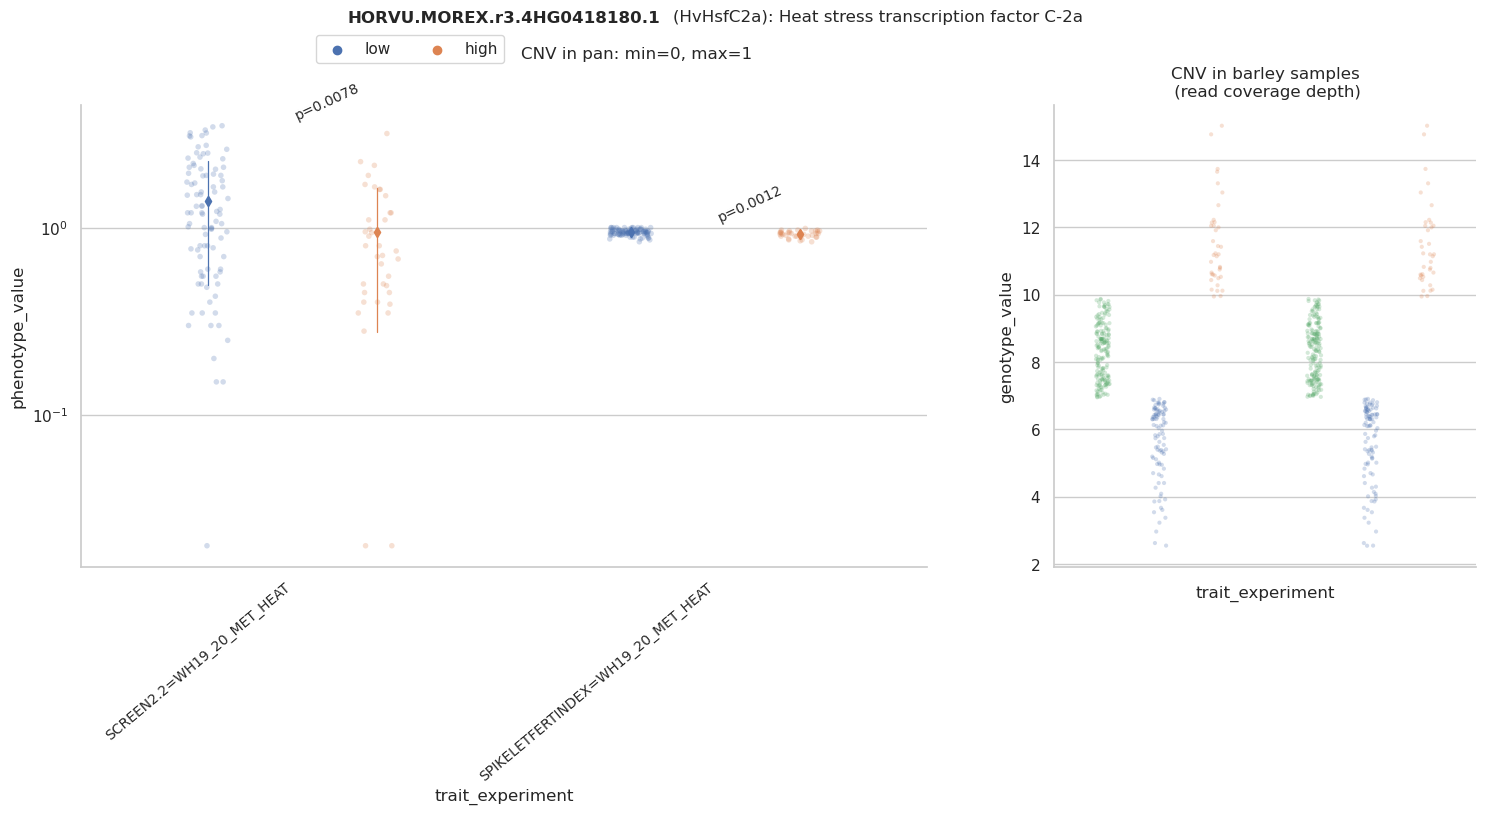

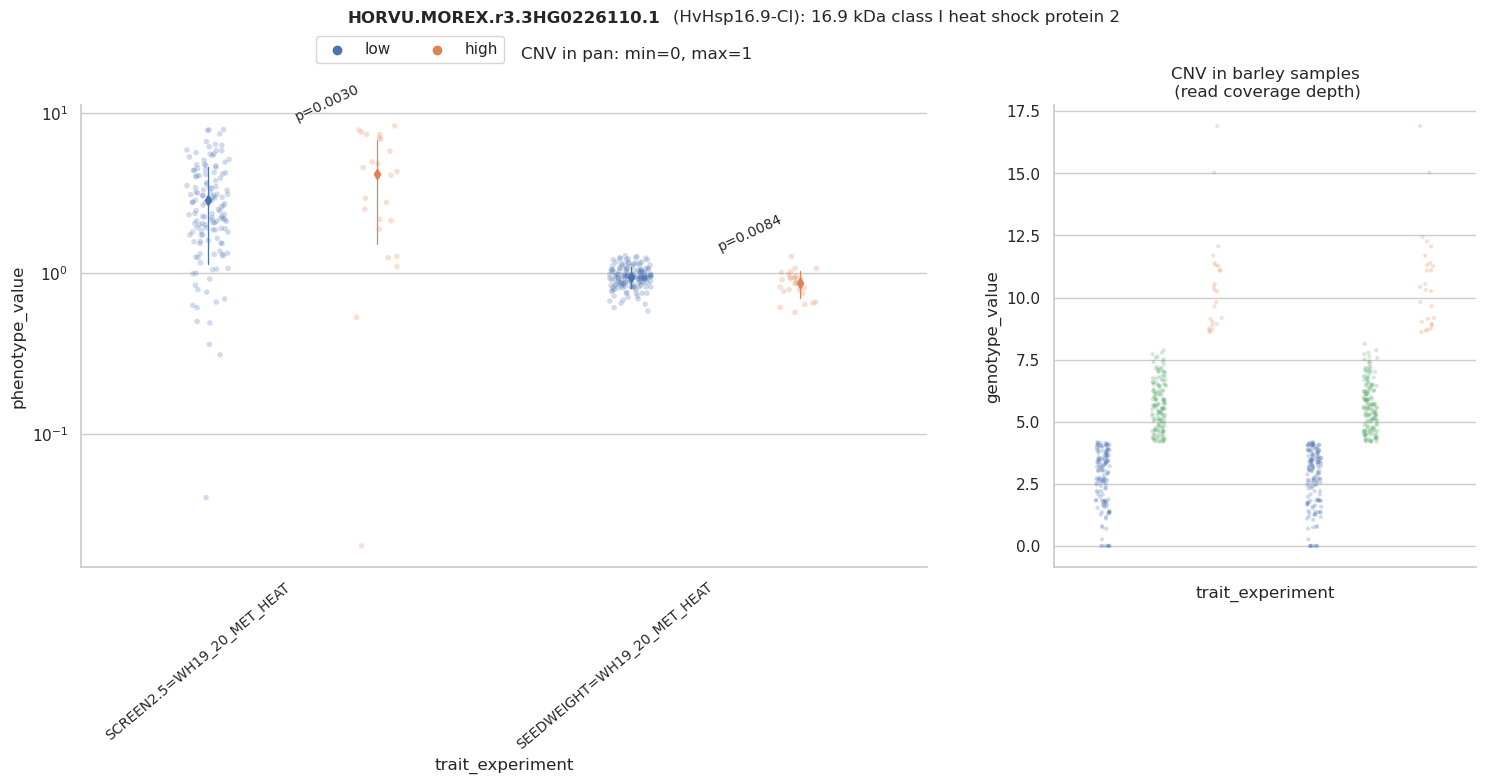

In [74]:
###### add coverage matrix in subplots and plot only low and high for phenotype
import warnings
# Filter out the specific FutureWarning
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*", category=FutureWarning)

# Generate the stripplot with x
for GENE in df_target_all[df_target_all["p_value"] < 0.01]['gene'].unique(): ## change the threshold here
    f, axes = plt.subplots(1,2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})
    sns.despine(bottom=True, left=True)
    sns.set_theme(style="whitegrid")
    color_map = {'low':colors[0],'mid':colors[2],'high':colors[1]}
    
    ################# filter gene data
    #df_gene = df_target_all[df_target_all['gene'] == GENE]
    df_gene = df_target_all[df_target_all["p_value"] < 0.01] ## and here
    df_gene = df_gene[df_gene['gene'] == GENE]
    
    df_gene2 = df_gene[df_gene['genotype_cluster'] != 'mid'] ## to hide mid cluster
    
    ## get xticklabels and sort and use as order in plot
    sorted_xlabels = sorted(df_gene2['trait_experiment'].unique())
    
    ###### plot phenotype
    sns.stripplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
                      alpha=.25, size=4, zorder=1, palette=color_map, order=sorted_xlabels ) ##  palette=color_map
    
    sns.pointplot(ax=axes[0], data=df_gene2, y="phenotype_value", x="trait_experiment", hue="genotype_cluster", order=sorted_xlabels,
                    join=False, dodge=0.4, markers="d", scale=.7, errorbar='sd',errwidth=0.9, palette=color_map)  ## palette=color_map
    
    # Extract the unique hue categories
    trait_experiments = df_gene2['trait_experiment'].unique()
    
    # Perform t-test and annotate p-value for each hue category
    for trait_experiment in trait_experiments:
        group1 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "low")]["phenotype_value"].dropna()
        group2 = df_gene2[(df_gene2["trait_experiment"] == trait_experiment) & (df_gene2["genotype_cluster"] == "high")]["phenotype_value"].dropna()
        t_stat, p_value = ttest_ind(group1, group2)
        annotation_text = f"p={p_value:.4f}"
        
        xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()]
        x_pos = xtick_labels.index(trait_experiment)
        y_pos = max(group1.max(), group2.max()) # Adjust the y-position as needed
        y_pos = y_pos * 1.08
        axes[0].annotate(annotation_text, xy=(x_pos, y_pos), xycoords="data", ha="left",fontsize=10, rotation=25)
    
    ## extract min and max in 76 and annotate on plot
    MIN = df_pan_group.loc[GENE,'min']
    MAX = df_pan_group.loc[GENE,'max']
    annotation_text2 = f"CNV in pan: min={MIN:d}, max={MAX:d}"
    axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
    

    ##change xticklabels
    xtick_labels = [tick.get_text() for tick in axes[0].get_xticklabels()] 
    axes[0].set_xticklabels(xtick_labels, rotation = 40, ha='right', fontsize=10)
    
    #xticklabels color
    for i in np.arange(0,len(xtick_labels)):
        if "GrYld" in xtick_labels[i]:
            color=colors[3]
            t=axes[0].xaxis.get_ticklabels()[i]
            t.set_color(color)
        elif "PlHt" in xtick_labels[i]:
            color=colors[4]
            t=axes[0].xaxis.get_ticklabels()[i]
            t.set_color(color)
            
    
    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = axes[0].get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    legend0 = axes[0].legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.5, 1.15), ncol=2, borderaxespad=0.)  ## change depending one how many clusters
    ### ANNOTATE TITLE TO INCLUDE GENE NAME
    axes[0].set_title(GENE,fontweight='bold',x=0.5,y=1.16)
    GENE_name = df_gene_name.loc[GENE,'Gene name']
    GENE_func = df_gene_name.loc[GENE,'Gene annotation IBSC']
    annotation_text3 = f"({GENE_name}): {GENE_func}"
    axes[0].annotate(annotation_text3, xy= (0.7, 1.18), xycoords='axes fraction')
    axes[0].set_yscale('log')
    
    ########## create the second axes
    #### plot genotype
    sns.stripplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster", jitter=True, dodge=True,
                      alpha=.25, zorder=1,size=3, palette=color_map, order=sorted_xlabels) ## palette=color_map
    
    # sns.pointplot(ax=axes[1], data=df_gene, y="genotype_value", x="trait_experiment", hue="genotype_cluster",
    #     join=False, dodge=0.4, palette="dark", markers="d", scale=.75, errorbar=None)
    
    # annotation_text3 = f"CNV in 502 barley samples\n (read coverage depth)"
    # axes[0].annotate(annotation_text2, xy= (0.52, 1.1), xycoords='axes fraction')
    
    axes[1].set_title("CNV in barley samples\n (read coverage depth)",x=0.5,y=1)
    axes[1].legend([],frameon=False)
    axes[1].set_xticklabels([])
    
    ###################### Display the plot
    sns.despine()
    plt.savefig("./plot_pvalue_01_with_CNV_3kmeans_plot2_with_function/" + GENE + ".png",dpi=300, bbox_inches='tight')